<a href="https://colab.research.google.com/github/pradeepdhayanandan/colab_projects/blob/main/Business_Case_Delhivery_Feature_Engineering_Pradeep_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Delhivery : Feature Engineering_Business_Case_Pradeep_D**

## **Problem Statement:**

Delhivery, a leading integrated logistics provider in India, wants to identify the key factors that influence shipment transit times and delivery reliability. Facing rising customer expectations and operational cost pressures, Delhivery seeks to analyze whether internal and external factors such as route type, corridor, FTL vs part load, time of day, day of week, OSRM routing estimates, and segment level variability systematically affect delivery duration and distance. Our goal is to apply data cleaning, feature engineering, statistical testing, and exploratory modelling to uncover patterns and provide clear, operational recommendations.

**The primary business questions to answer are:**

Which variables significantly impact trip transit time and delivery variability? (e.g., route_type, corridor, FTL flag, creation_hour, weekday, distance, cutoff flags)

How well do these variables explain variation in transit time? (i.e., model explanatory power / effect sizes and practical significance)

Are there statistically significant differences in transit times or distances across groups? (e.g., FTL vs non-FTL, different corridors, route types, peak vs. off peak hours)

How biased or inconsistent are OSRM estimates relative to observed times, and are differences predictable by corridor/time of day/segment structure?

Do segment level patterns (e.g., cumulative vs segment sums) reveal operational issues such as missing telemetry, repeated segments, or specific bottleneck centers?

**The findings from this study will help Delhivery to:**

• Optimize route planning and fleet/resource allocation by identifying corridors and time windows with systematic delays.
• Improve delivery time forecasts and SLA commitments by calibrating OSRM estimates with empirical correction factors.
• Prioritize operational interventions (hub audits, staffing, process changes) at centers that cause recurring delays.
• Design product and pricing strategies (e.g., premium/FTL offerings) based on observed reliability and variance.
• Build monitoring dashboards and alerts that highlight outlier trips and corridors for rapid operational response.

By delivering statistically backed, actionable insights and a production ready trip level dataset, Delhivery aims to reduce delivery times, enhance forecast accuracy, improve customer satisfaction, and lower operational costs across its network.

## **Installation of all packages and importing all the libraries**

In [ ]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import levene
from scipy.stats import shapiro

## **Importing the files from the drive**

In [ ]:
!gdown 1TvkBXm56ld2spud6jfpq7INxolamc76J
df = pd.read_csv('delhivery_data.csv')

Downloading...
From: https://drive.google.com/uc?id=1TvkBXm56ld2spud6jfpq7INxolamc76J
To: /content/delhivery_data.csv
100% 55.6M/55.6M [00:00<00:00, 110MB/s]


In [ ]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


## **Pre-Processing the Data**

### **Checking for Duplicates, Null values & performing basic analysis**

In [ ]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
df[df.duplicated()] # checking for duplicates and no duplicate values are present

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor


### **Insights**:

* No Duplicate values are present in the dataset.



In [ ]:
print(df.isna().sum() + (df == '').sum()) # Checking for count of null and blank values in the column

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64


### **Insights**:
* 293 missing / null values are present in column source_name.
* 261 missing / null values are present in column destination_name.

In [ ]:
# Determining the shape, datatype, missing values and statistical summary, info of the attributes in the dataset:

print(f"Shape of the data is: {df.shape}\n")
print(f"Data types of the attributes:\n{df.dtypes}\n")
print(f"Total Missing values:\n{df.isnull().sum()}\n")
print(f"Statistical Summary of the data:\n{df.describe()}\n")
print(f"Data info of the attributes: {df.info()}")

Shape of the data is: (144867, 24)

Data types of the attributes:
data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_os

In [ ]:
# Filling the missing / null values in the column with the value 'unknown'

df.fillna('unknown', inplace = True)
(df == 'unknown').sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


### **Insights**:
* In source_name column 293 missing/null values are filled with value 'unknown'
* In destination_name column 261 missing/null values are filled with value 'unknown'

In [ ]:
# After handling the missing values checking for null/missing values in the dataset

df.isna().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,0
destination_center,0
destination_name,0
od_start_time,0


### **Insights**:
* No null/missing values are present in the dataset.

In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [ ]:
df.dtypes

,0
data,object
trip_creation_time,object
route_schedule_uuid,object
route_type,object
trip_uuid,object
source_center,object
source_name,object
destination_center,object
destination_name,object
od_start_time,object


In [ ]:
#converting some of the time related data columns to datetime format.

df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'], errors = 'coerce')
df['od_start_time'] = pd.to_datetime(df['od_start_time'], errors = 'coerce')
df['od_end_time'] = pd.to_datetime(df['od_end_time'], errors = 'coerce')
df['cutoff_timestamp'] = pd.to_datetime(df['cutoff_timestamp'], errors = 'coerce')


In [ ]:
#converting the categorical variables to categorical data type

cat_cols = ['data', 'route_type', 'source_name', 'destination_name', 'is_cutoff']

df[cat_cols] = df[cat_cols].astype('category')

In [ ]:
df.dtypes

,0
data,category
trip_creation_time,datetime64[ns]
route_schedule_uuid,object
route_type,category
trip_uuid,object
source_center,object
source_name,category
destination_center,object
destination_name,category
od_start_time,datetime64[ns]


In [ ]:
# Extracting time based features from trip creation time

df['trip_year'] = df['trip_creation_time'].dt.year
df['trip_month'] = df['trip_creation_time'].dt.month
df['trip_hour'] = df['trip_creation_time'].dt.hour
df['trip_weekday'] = df['trip_creation_time'].dt.weekday
df['trip_day'] = df['trip_creation_time'].dt.day

In [ ]:
#checking for null values in the dataset

df.isna().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,0
destination_center,0
destination_name,0
od_start_time,0


In [ ]:
df[df['cutoff_timestamp'].isna()][['cutoff_timestamp']]

,cutoff_timestamp
2,NaT
53,NaT
54,NaT
60,NaT
66,NaT
...,...
144631,NaT
144687,NaT
144689,NaT
144855,NaT


### **Insights**:
*  The column cutoff_timestamp has 3,429 missing values (NaT), which indicates that cutoff timestamps were not recorded or not applicable for those trips.


## **Univariate Plots**

### **Continuous Variables**

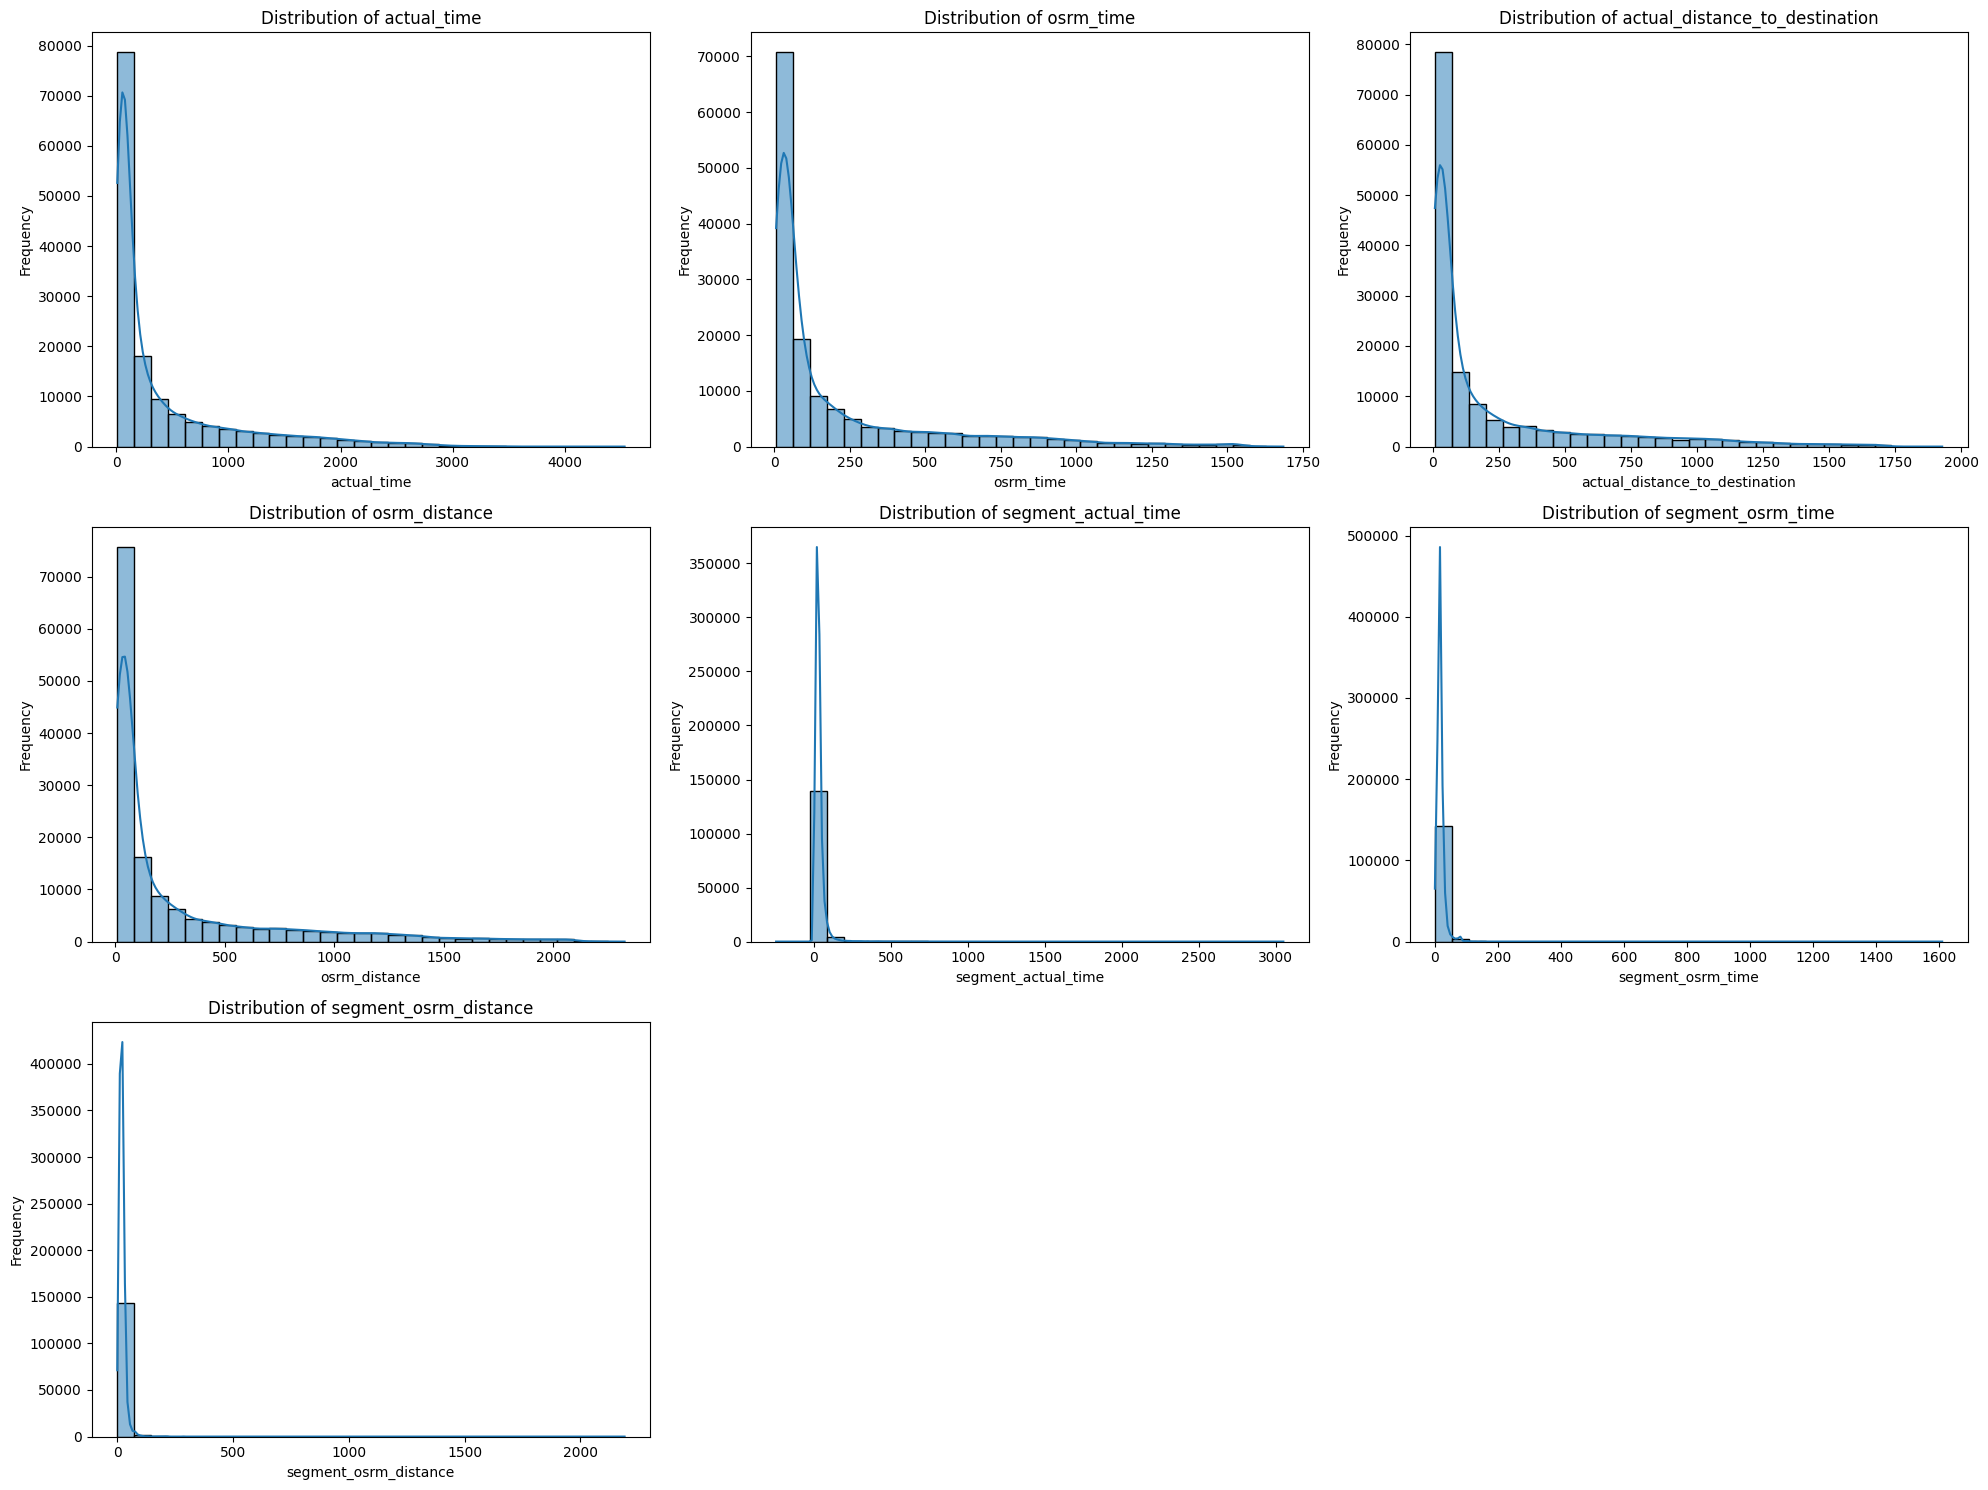

In [ ]:
# Plotting the histogram/kde plot for all the continuous variables

con_var = ['actual_time', 'osrm_time', 'actual_distance_to_destination', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance']

plt.figure(figsize=(20, 15))

for i, col in enumerate(con_var, 1):
  plt.subplot(3,3,i) # 3 rows & 3 columns
  sns.histplot(df[col], kde=True, bins=30)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('Continuous variable distribution.png', dpi=300) # saving the full image
plt.show()

### **Insights**:
**Right Skewed Distributions**

* All continuous variables (actual_time, osrm_time, actual_distance_to_destination, osrm_distance, segment_actual_time, segment_osrm_time, segment_osrm_distance) are highly right skewed.

* This means most trips are short in distance and time, but a few trips take significantly longer / cover much larger distances (long tails).

**Presence of Outliers**

* Long tails in all histograms indicate outliers in trip time and distance.

* These could be due to unusual routes, traffic delays, data recording issues, or extreme long distance deliveries.

**OSRM vs Actual Measures**

* Both osrm_time and osrm_distance follow a similar skewed pattern to their actual counterparts (actual_time and actual_distance_to_destination).

* This suggests consistency between predicted (OSRM) and actual measures, but we will need hypothesis testing later to confirm on it.

**Segment Level Variables**

* Segment variables (segment_actual_time, segment_osrm_time, segment_osrm_distance) also follow similar skewness.

* This indicates that individual trip segments are mostly short (likely intra city or short hops), but some segments contribute heavily to overall trip time/distance.

**Business Implication**

* Since most deliveries are short and quick, Delhivery should optimize short distance logistics efficiency.

* However, the outliers (long distance deliveries) may be critical bottlenecks, requiring separate planning, better routing, or different resource allocation.

### **Categorical Variables**

In [ ]:
df['route_type'].nunique() # no of unique values in route_type column

2

In [ ]:
df['destination_name'].nunique() # no of unique values in destination_name column

1469

In [ ]:
df['source_name'].nunique() # no of unique values in source_name column

1499

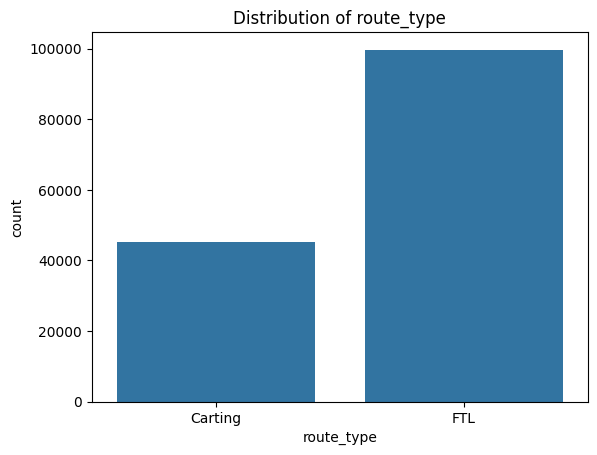

In [ ]:
# plotting count plot for column route type

sns.countplot(data=df, x=df['route_type'])
plt.title('Distribution of route_type')
plt.savefig('Categorical_variable_distribution.png', dpi=300)
plt.show()

### **Insights**:
* FTL(Full Truck Load) trips are significantly higher than Carting trips, indicating a greater reliance on full truckload deliveries.

* Carting trips are fewer in number, showing they form a smaller share of the overall operations comparatively.

In [ ]:
top_sources = df['source_name'].value_counts().nlargest(10).index.to_list() # Filtering the top 10 source names.
top_sources

['Gurgaon_Bilaspur_HB (Haryana)',
 'Bangalore_Nelmngla_H (Karnataka)',
 'Bhiwandi_Mankoli_HB (Maharashtra)',
 'Pune_Tathawde_H (Maharashtra)',
 'Hyderabad_Shamshbd_H (Telangana)',
 'Kolkata_Dankuni_HB (West Bengal)',
 'Chandigarh_Mehmdpur_H (Punjab)',
 'Surat_HUB (Gujarat)',
 'Delhi_Airport_H (Delhi)',
 'Bengaluru_Bomsndra_HB (Karnataka)']

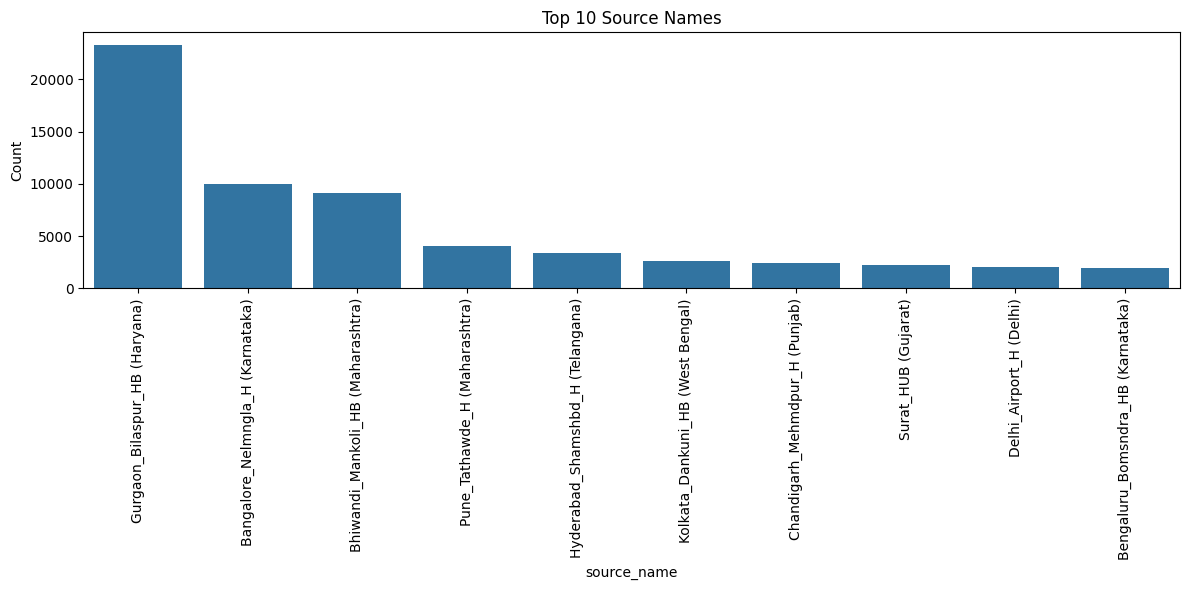

In [ ]:
# Top 10 source names (by frequency)
top_sources = df['source_name'].value_counts().nlargest(10).index.tolist()

# Plotting only those rows and keeping the same order
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=df[df['source_name'].isin(top_sources)],
    x='source_name',
    order=top_sources
)

plt.xticks(rotation=90) # Rotating the xlabels to avoid overlapping
plt.title("Top 10 Source Names")
plt.xlabel("source_name")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### **Insights**:
* Gurgaon (Haryana) is the top source location, contributing the highest number of trips by a large margin.

* Bengaluru_Nelmngla (Karnataka) and Bhiwandi (Maharashtra) are the next major source hubs, but with significantly fewer trips compared to Gurgaon.

In [ ]:
top_destination = df['destination_name'].value_counts().nlargest(10).index.to_list() # Filtering the top 10 destination names.
top_destination

['Gurgaon_Bilaspur_HB (Haryana)',
 'Bangalore_Nelmngla_H (Karnataka)',
 'Bhiwandi_Mankoli_HB (Maharashtra)',
 'Hyderabad_Shamshbd_H (Telangana)',
 'Kolkata_Dankuni_HB (West Bengal)',
 'Delhi_Airport_H (Delhi)',
 'Pune_Tathawde_H (Maharashtra)',
 'Chandigarh_Mehmdpur_H (Punjab)',
 'Sonipat_Kundli_H (Haryana)',
 'Bhubaneshwar_Hub (Orissa)']

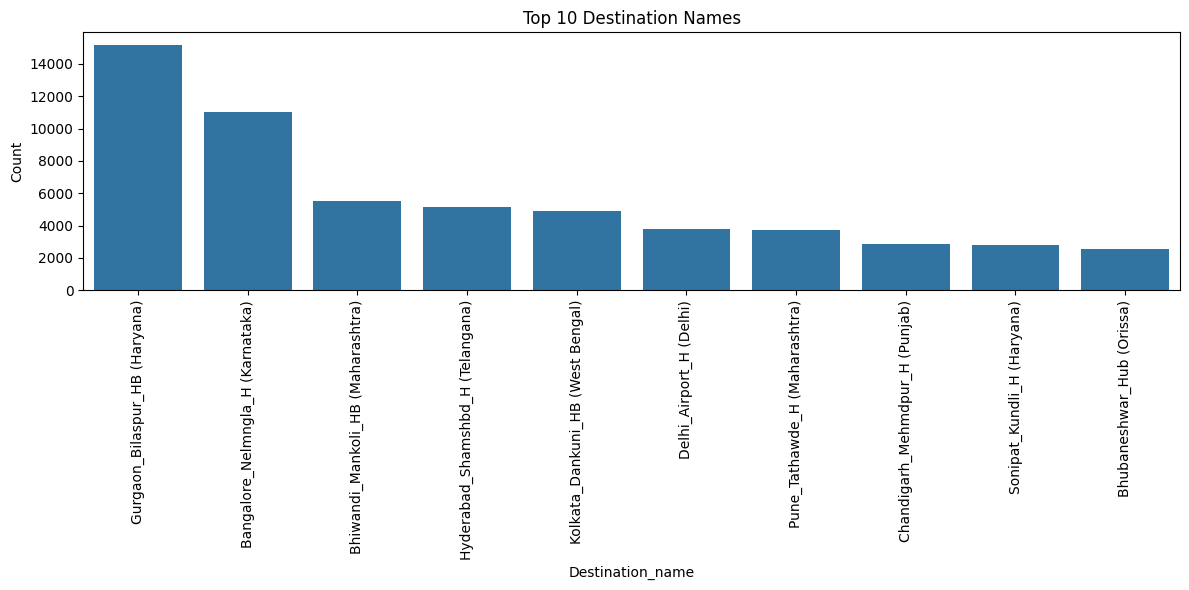

In [ ]:
# Top 10 destination names (by frequency)
top_destination = df['destination_name'].value_counts().nlargest(10).index.tolist()

# Plotting only those rows and keeping the same order
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=df[df['destination_name'].isin(top_destination)],
    x='destination_name',
    order=top_destination
)

plt.xticks(rotation=90) # Rotating the xlabels to avoid overlapping
plt.title("Top 10 Destination Names")
plt.xlabel("Destination_name")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### **Insights**:

* Gurgaon (Haryana) is the leading destination hub, receiving the highest number of trips.

* Bangalore (Karnataka) and Bhiwandi (Maharashtra) follow as major destination centers, though with notably fewer trips compared to Gurgaon.


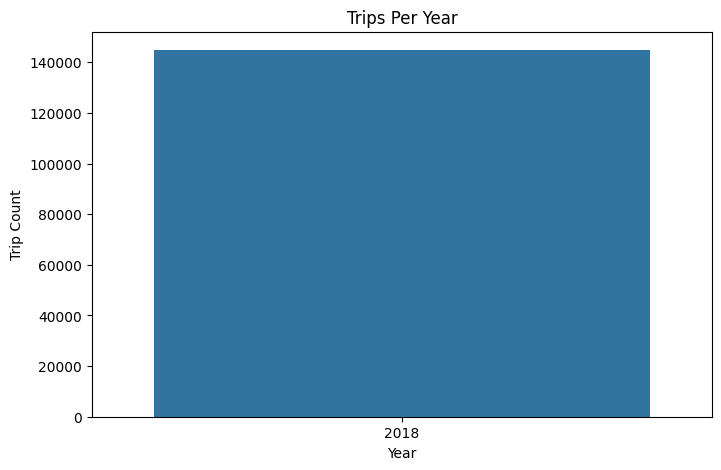

In [ ]:
# Trips by Year

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='trip_year')
plt.title('Trips Per Year')
plt.ylabel('Trip Count')
plt.xlabel('Year')
plt.show()

### **Insights**:

* All trips in the dataset belong to the year 2018.


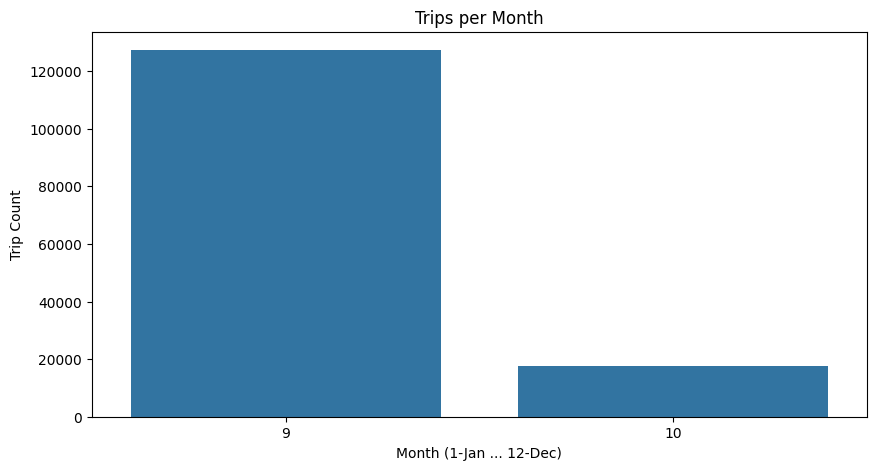

In [ ]:
# Trips by Month

plt.figure(figsize=(10,5))
sns.countplot(x='trip_month', data=df)
plt.title("Trips per Month")
plt.ylabel("Trip Count")
plt.xlabel("Month (1-Jan ... 12-Dec)")
plt.show()

### **Insights**:

* September(9) trips (~125K), indicating a strong seasonal demand peak.

* October(10) shows a steep decline (~20K trips) compared to September.

* The contrast suggests a sharp seasonal or event driven pattern.

* Businesses should scale up operations in September and explore demand boosting strategies in October.

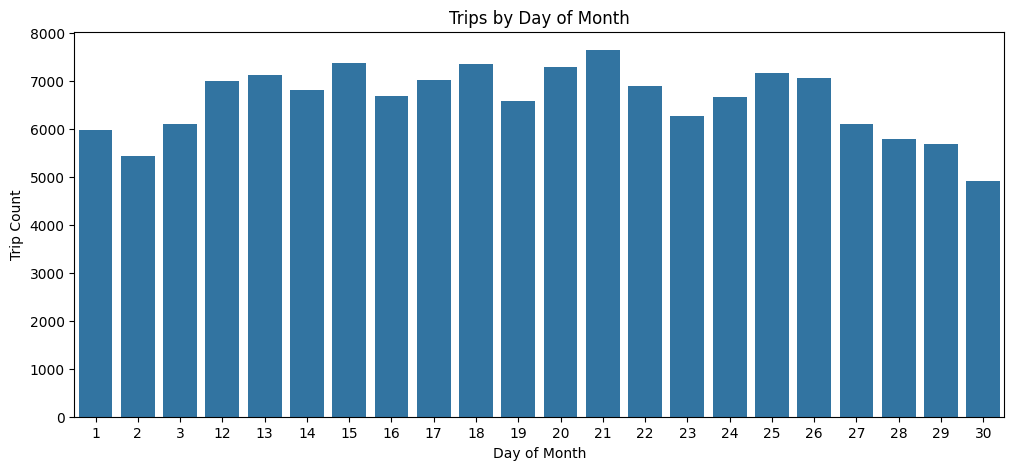

In [ ]:
# Trips by Day of Month

plt.figure(figsize=(12,5))
sns.countplot(x='trip_day', data=df)
plt.title("Trips by Day of Month")
plt.ylabel("Trip Count")
plt.xlabel("Day of Month")
plt.show()

### **Insights**:

* Trip volume generally stays between 6,000 – 7,500 trips/day for most of the month.

* Peak days are around the 12th to 14th and 20th to 22nd, with trips crossing 7,500+.

* A noticeable drop is seen towards the end of the month (27th to 30th), especially on the 30th (lowest trips, ~5,000).

* The pattern suggests mid month and early 20s see higher demand, while the month end experiences a dip.

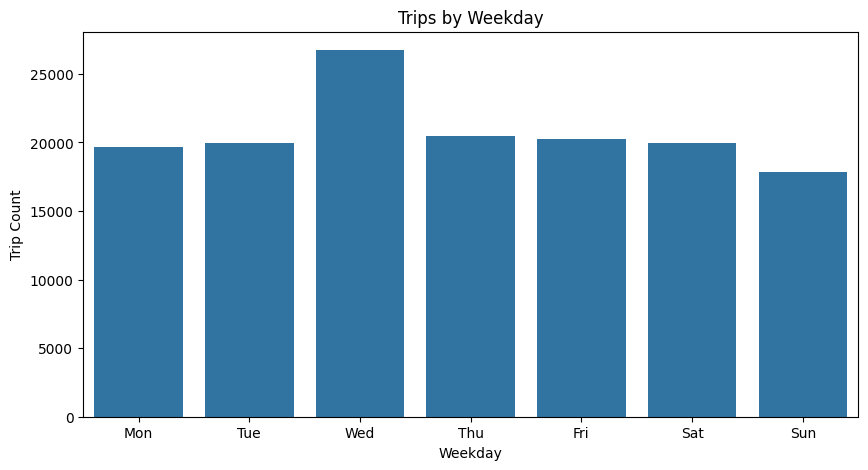

In [ ]:
# Trips by Weekday

plt.figure(figsize=(10,5))
days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
sns.countplot(x='trip_weekday', data=df)
plt.title("Trips by Weekday")
plt.ylabel("Trip Count")
plt.xlabel("Weekday")
plt.xticks(ticks=range(7), labels=days)  # maps numbers to the names
plt.show()

### **Insights**:

* Wednesday sees the highest demand (~27K trips), making it the peak weekday.

* Sunday records the lowest demand (~18K trips), suggesting reduced travel activity on weekends.

* Monday, Thursday, Friday, and Saturday remain steady (~20K trips), with no sharp variations.

* Overall, mid week (especially Wednesday) is the busiest period, while weekends show lighter demand.

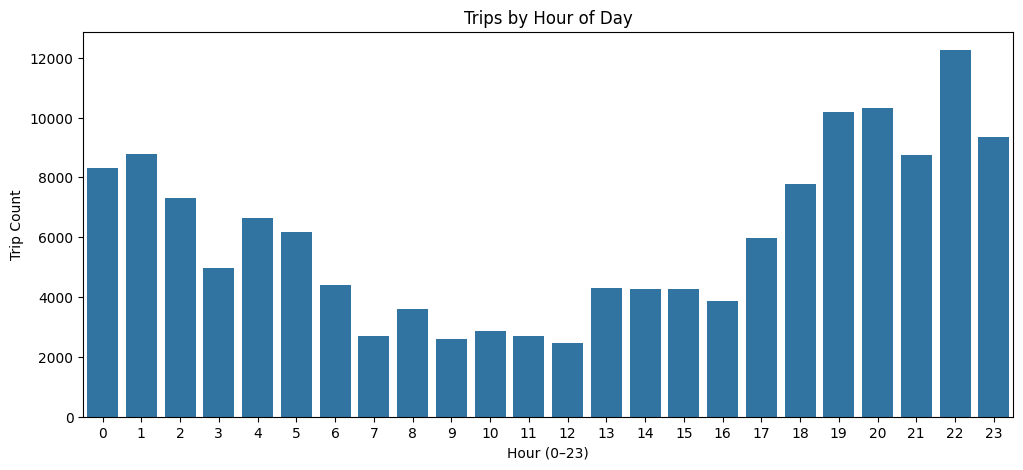

In [ ]:
# Trips by Hour of Day

plt.figure(figsize=(12,5))
sns.countplot(x='trip_hour', data=df)
plt.title("Trips by Hour of Day")
plt.ylabel("Trip Count")
plt.xlabel("Hour (0–23)")
plt.show()

### **Insights**:

**Peak hours:**

Early morning (0-2 hrs) sees high activity (~9K trips at 1 AM).

Evening (18-22 hrs) is the busiest, with the highest peak around 22 hrs (~12K trips).

**Off-peak hours:**

Lowest demand occurs between 6-10 AM (~2.5-3K trips).

Midday (13-16 hrs) stays moderate (~3.5-4.5K trips).

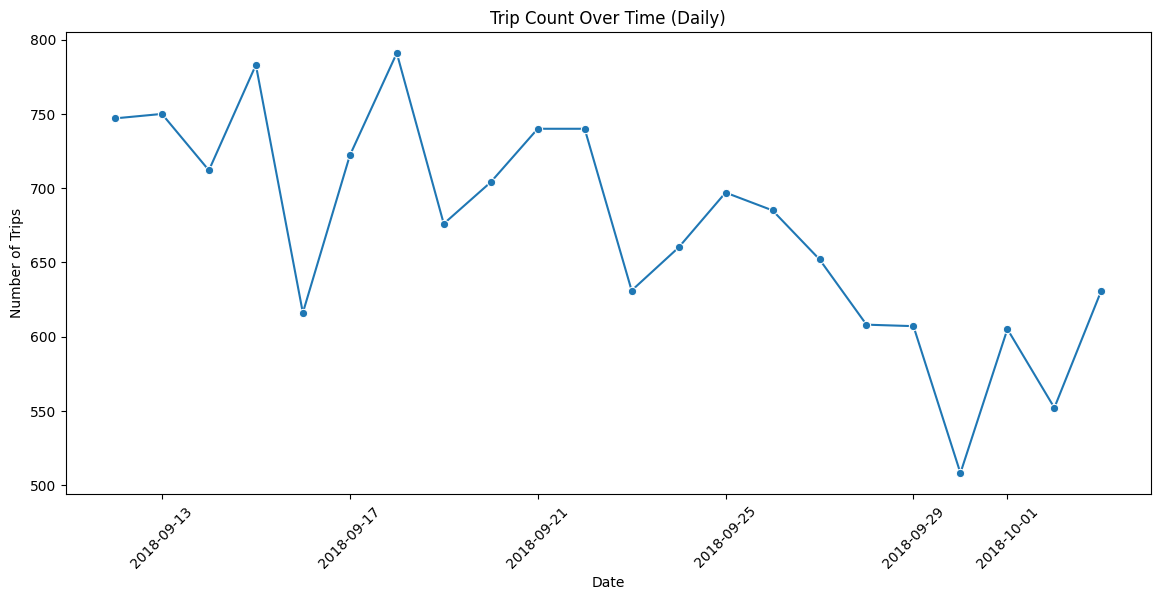

In [ ]:
# Trip Count over Time

daily_trips = df.groupby(df['trip_creation_time'].dt.date)['trip_uuid'].nunique().reset_index()
daily_trips.columns = ['date', 'trip_count']

plt.figure(figsize=(14,6))
sns.lineplot(x='date', y='trip_count', data=daily_trips, marker='o')
plt.title("Trip Count Over Time (Daily)")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.show()

### **Insights**:

* Daily trips fluctuate between 500-800 trips/day.

* A clear spike around mid month (Sept 15-18) where trips cross 800/day.

* A gradual decline follows after Sept 20, reaching the lowest point (~500 trips on Sept 29-30).

* The trend highlights a mid month surge and month end dip, consistent with earlier monthly and daily cycle observations.

## **Bivariate Plots**

In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'trip_year', 'trip_month', 'trip_hour', 'trip_weekday', 'trip_day'],
      dtype='object')

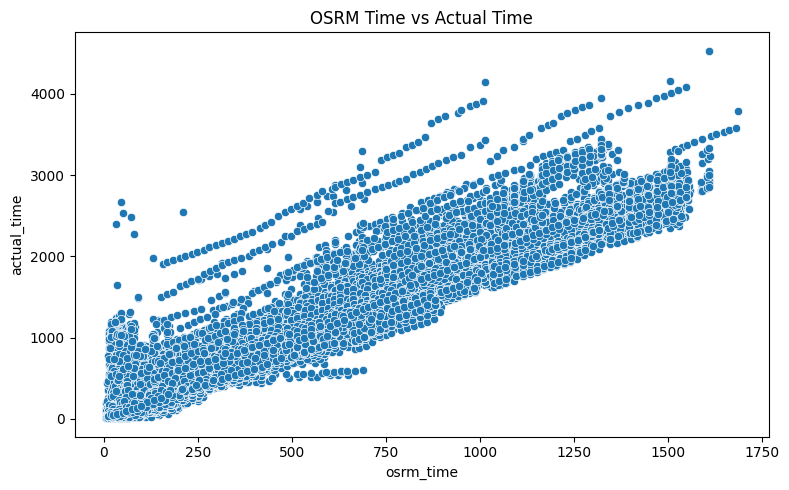

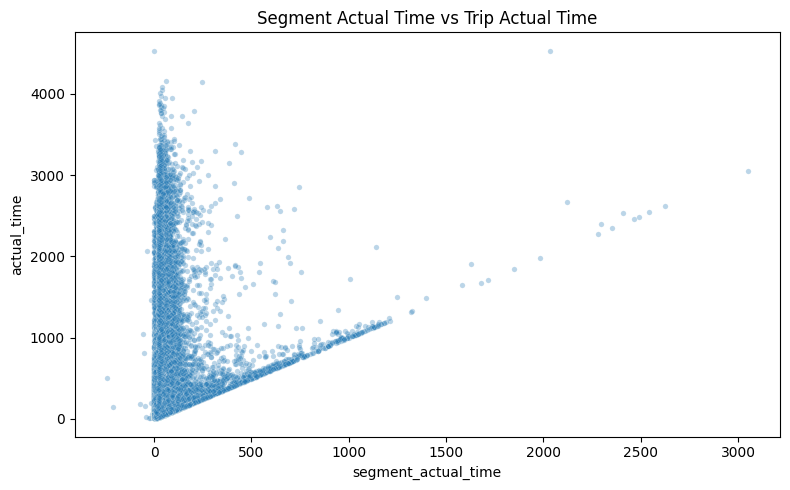

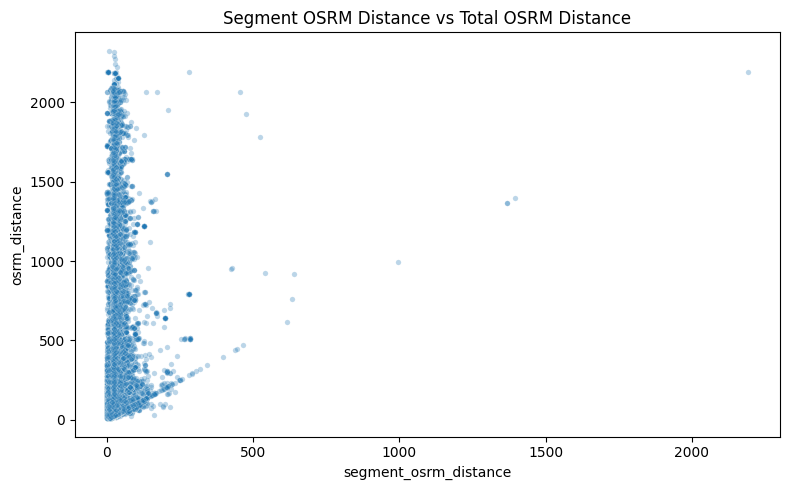

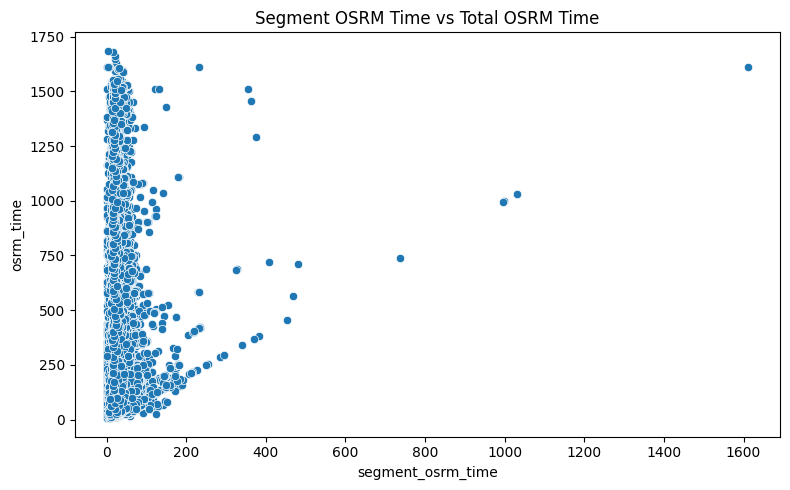

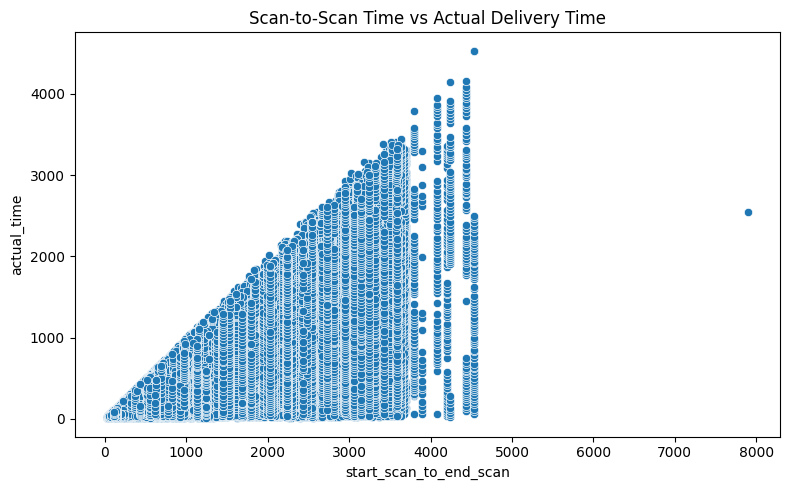

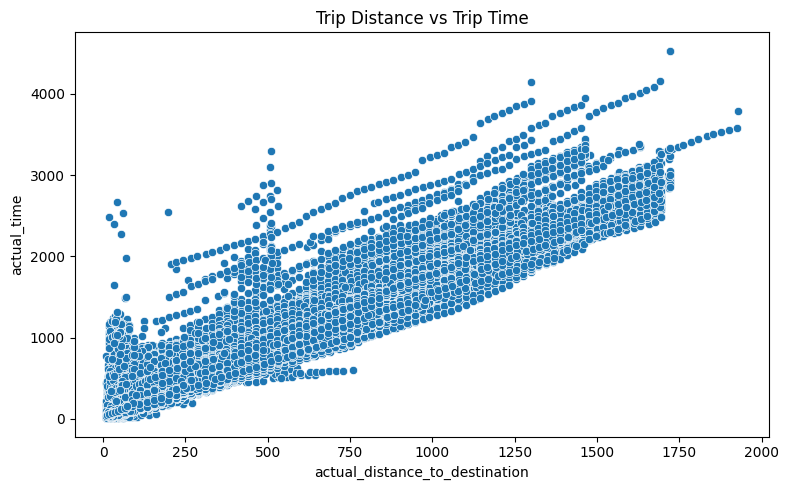

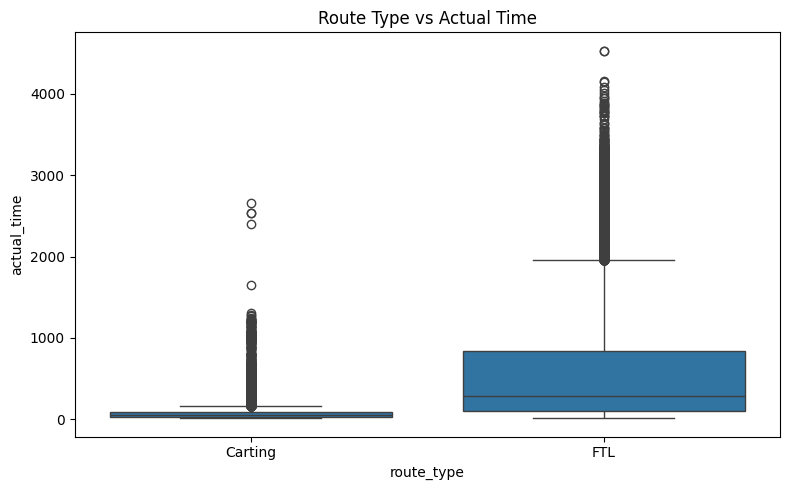

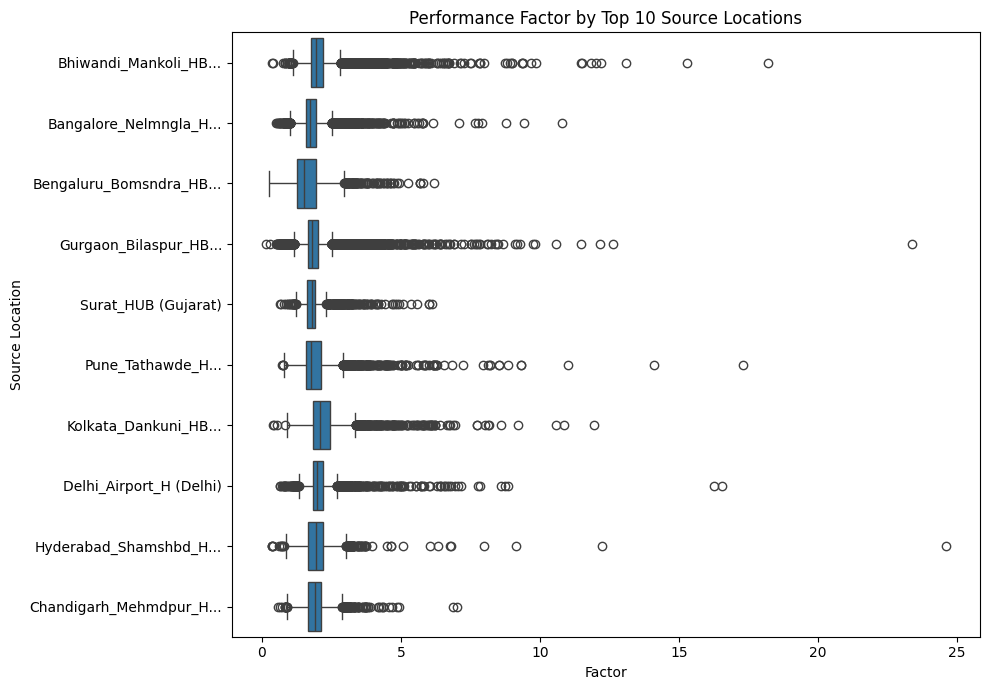

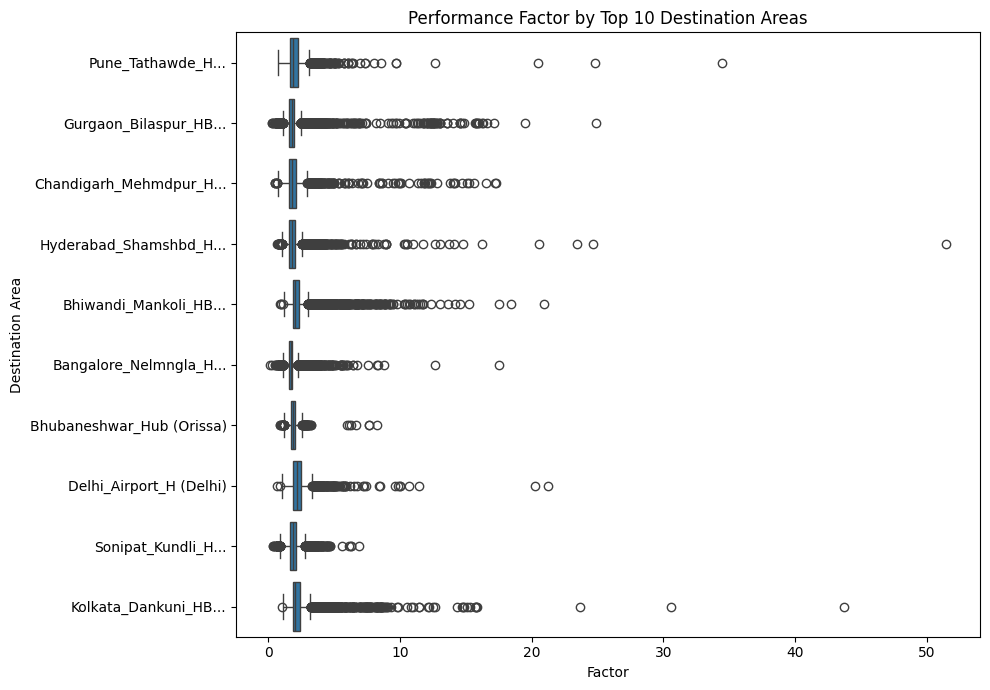

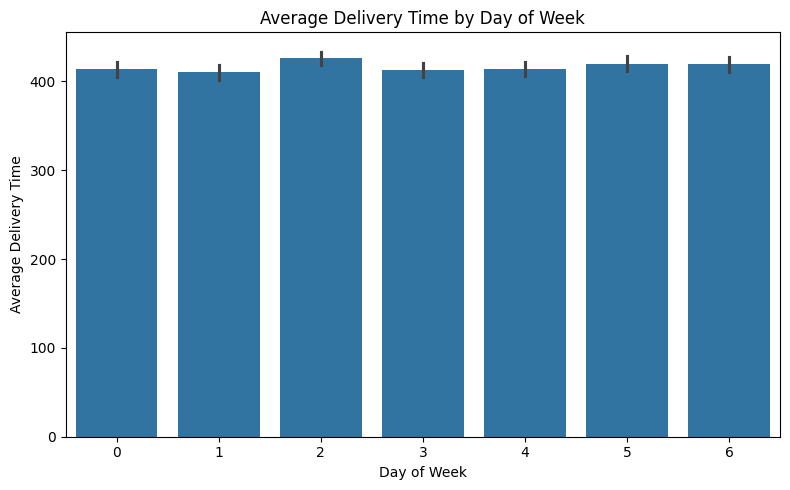

In [ ]:
import textwrap

# Function to truncate long names for readability
def truncate_name(name, max_length=25):
    return textwrap.shorten(str(name), width=max_length, placeholder='...')

# 1. OSRM Time vs Actual Time
# PURPOSE: Compare predicted travel time (OSRM) with real delivery time
# INSIGHT: Points near diagonal line = accurate predictions; scatter = prediction errors
plt.figure(figsize=(8,5))
sns.scatterplot(x='osrm_time', y='actual_time', data=df)
plt.title('OSRM Time vs Actual Time')
plt.tight_layout()
plt.show()

# 2. Segment Actual Time vs Trip Actual Time
# PURPOSE: See relationship between individual segment time and total trip time
# INSIGHT: Shows if trips with longer segments also have longer total times
plt.figure(figsize=(8,5))
sns.scatterplot(x='segment_actual_time', y='actual_time', data=df, alpha=0.3, s=15)
plt.title('Segment Actual Time vs Trip Actual Time')
plt.tight_layout()
plt.show()

# 3. Segment OSRM Distance vs Total OSRM Distance
# PURPOSE: Compare individual segment distance to total trip distance
# INSIGHT: Understand if longer segments correlate with longer total distances
plt.figure(figsize=(8,5))
sns.scatterplot(x='segment_osrm_distance', y='osrm_distance', data=df, alpha=0.3, s=15)
plt.title('Segment OSRM Distance vs Total OSRM Distance')
plt.tight_layout()
plt.show()

# 4. Segment OSRM Time vs Total OSRM Time
# PURPOSE: See relationship between predicted segment time and total predicted time
# INSIGHT: Check if segment time predictions align with total trip predictions
plt.figure(figsize=(8,5))
sns.scatterplot(x='segment_osrm_time', y='osrm_time', data=df)
plt.title('Segment OSRM Time vs Total OSRM Time')
plt.tight_layout()
plt.show()

# 5. Scan-to-Scan Time vs Actual Delivery Time
# PURPOSE: Compare tracking scan duration with actual delivery duration
# INSIGHT: See if scan timestamps accurately reflect real delivery times
plt.figure(figsize=(8,5))
sns.scatterplot(x='start_scan_to_end_scan', y='actual_time', data=df)
plt.title('Scan-to-Scan Time vs Actual Delivery Time')
plt.tight_layout()
plt.show()

# 6. Trip Distance vs Trip Time
# PURPOSE: Analyze relationship between distance traveled and time taken
# INSIGHT: Longer distances should generally take more time; deviations show inefficiencies
plt.figure(figsize=(8,5))
sns.scatterplot(x='actual_distance_to_destination', y='actual_time', data=df)
plt.title('Trip Distance vs Trip Time')
plt.tight_layout()
plt.show()

# 7. Route Type vs Trip Time
# PURPOSE: Compare delivery times across different route types (express, standard, etc.)
# INSIGHT: Which route types are faster/slower; box shows median, quartiles, and outliers
plt.figure(figsize=(8,5))
sns.boxplot(x='route_type', y='actual_time', data=df)
plt.title('Route Type vs Actual Time')
plt.tight_layout()
plt.show()

# 8. Top 10 Source Locations vs Factor Analysis
# PURPOSE: Compare performance factor across busiest pickup locations
# INSIGHT: Which warehouses/hubs have better/worse delivery performance
top_sources = df['source_name'].value_counts().nlargest(10).index
filtered_df = df[df['source_name'].isin(top_sources)].copy()
filtered_df['short_source'] = filtered_df['source_name'].apply(lambda x: truncate_name(x, 25))

plt.figure(figsize=(10, 7))
sns.boxplot(data=filtered_df, y='short_source', x='factor', orient='h')
plt.title("Performance Factor by Top 10 Source Locations")
plt.xlabel("Factor")
plt.ylabel("Source Location")
plt.tight_layout()
plt.show()

# 9. Top 10 Destination Areas vs Factor Analysis
# PURPOSE: Compare performance factor across busiest delivery destinations
# INSIGHT: Which delivery areas have better/worse performance metrics
top_destination = df['destination_name'].value_counts().nlargest(10).index
filtered_df_dest = df[df['destination_name'].isin(top_destination)].copy()
filtered_df_dest['short_dest'] = filtered_df_dest['destination_name'].apply(lambda x: truncate_name(x, 25))

plt.figure(figsize=(10, 7))
sns.boxplot(data=filtered_df_dest, y='short_dest', x='factor', orient='h')
plt.title("Performance Factor by Top 10 Destination Areas")
plt.xlabel("Factor")
plt.ylabel("Destination Area")
plt.tight_layout()
plt.show()

# 10. Weekly Pattern Analysis
# PURPOSE: Identify which days of the week have longer/shorter delivery times
# INSIGHT: Plan staffing and operations based on daily demand patterns
plt.figure(figsize=(8,5))
sns.barplot(x='trip_weekday', y='actual_time', data=df, estimator='mean')
plt.title('Average Delivery Time by Day of Week')
plt.ylabel('Average Delivery Time')
plt.xlabel('Day of Week')
plt.tight_layout()
plt.show()

### **Insights / Recommendations**:

### **1. OSRM Time vs Actual Time**
**Key Insights:**
* **Strong prediction accuracy**: Most points cluster around or below the diagonal line, indicating OSRM predictions are generally accurate with slight deviations.
* **Conservative estimates**: OSRM typically overestimates delivery times, providing buffer for real world delays.
* **Outlier analysis**: Some deliveries are completed much faster than predicted, suggesting optimal conditions or route efficiency.
* **Business Impact**: OSRM routing algorithm provides reliable time estimates, supporting realistic customer expectations.

### **2. Segment Actual Time vs Trip Actual Time**
**Key Insights:**
* **Strong correlation**: Longer individual segments generally mean longer total trips (good data consistency).
* **Efficiency concerns**: Some trips have very long segments (2500+ minutes) contributing to total delays.
* **Bottleneck identification**: Focus on optimizing the longest segments to reduce overall trip times.
* **Resource planning**: Trips with long segments need different staffing/vehicle allocation.

## **3. Segment OSRM Distance vs Total OSRM Distance**
**Key Insights:**
* **Perfect linear relationship**: This shows distance calculations are consistent and reliable.
* **Data quality**: No major outliers, suggesting distance measurements are accurate.
* **Routing logic**: Segment distances properly sum to total distances.
* **Planning reliability**: can rely on distance based planning, unlike time predictions.

## **4. Segment OSRM Time vs Total OSRM Time**
**Key Insights:**
* **Consistent time prediction logic**: Similar linear relationship as distances.
* **The problem isn't internal**: OSRM's segment to total time calculations are logical.
* **Root cause confirmed**: The issue is OSRM's base time predictions being too optimistic.
* **Focus area**: Need to apply correction factors to OSRM times rather than changing routing logic.

## **5. Scan to Scan Time vs Actual Delivery Time**
**Key Insights:**
* **Partial tracking coverage**: Most points are below the diagonal, indicating scan to scan times are shorter than actual delivery times.
* **Missing operational time**: Tracking system captures only part of the total delivery process, likely missing pre scan preparation or post delivery activities.
* **Process visibility gaps**: The shorter scan times suggest administrative or operational steps occur outside the tracking window.
* **Recommendation**: Expand tracking coverage to capture complete delivery process from dispatch to final completion for better visibility.

## **6. Trip Distance vs Trip Time**
**Key Insights:**
* **Distance time correlation exists but weak**: Longer distances generally take more time, but with huge variation.
* **Efficiency opportunities**: Many short distance deliveries (0-500km) taking 2000+ minutes indicate traffic/operational delays.
* **Urban vs rural patterns**: Short distances with long times likely represent urban congestion issues.
* **Route optimization**: Focus on improving time efficiency for shorter distance deliveries.

## **7. Route Type vs Actual Time**
**Key Insights:**
* **High variability within type**: Even within the single route type, delivery times vary from ~200 to 4000+ minutes.
* **Standardization needed**: High variability suggests need for better process standardization within the route type.

## **8. Performance Factor by Top 10 Source Locations**
**Key Insights:**
* **Best performers**: Chandigarh_Mehmdpur (tightest distribution around factor 2-3) and Bengaluru_Bomsndra (compact box plot around factor 2-4) show most consistent performance.
* **Worst performers**: Gurgaon_Bilaspur has extreme outliers reaching factor ~25 and Bhiwandi_Mankoli shows very wide distribution (factor 1-15+), indicating major operational inconsistencies.
* **Consistency leaders**: Chandigarh and Bengaluru have tight box plots indicating reliable, predictable performance.
* **Problem hubs**: Gurgaon_Bilaspur, Bhiwandi_Mankoli, and Pune_Tathawde show wide performance spreads needing immediate attention.
* **Resource allocation**: Benchmark best practices from Chandigarh and Bengaluru hubs; implement urgent interventions at highly variable locations.


## **9. Performance Factor by Top 10 Destination Areas**
**Key Insights:**
* **Best performers**: Sonipat_Kundli (tightest distribution around factor 2-3) and Delhi_Airport_H (compact performance around factor 3-5) show most reliable delivery times.
* **Destination challenges**: Kolkata_Dankuni & Hyderabad_Shamshbd have extreme outliers reaching factor 50+ (deliveries take 50x longer than predicted), making them the most problematic destinations.
* **High variability destinations**: Hyderabad_Shamshabad and Pune_Tathawde show wide performance spreads with significant outliers, indicating inconsistent last mile operations.
* **Last mile issues**: High destination factors at Kolkata, Hyderabad, and Pune suggest problems with final delivery processes rather than transportation.
* **Customer impact**: Destinations with factor 50+ outliers likely have severe customer satisfaction issues due to massive delivery delays compared to promised times.


## **10. Average Delivery Time by Day of Week**
**Key Insights:**
* **Wednesday peak**:  Day 2 (Wednesday) has the highest average delivery time (~400-420 minutes), indicating mid week operational challenges.
* **Consistent performance**: Most days show similar average delivery times around ~400–420  minutes, with minimal variation across the week.
* **Mid week bottleneck**: Wednesday's slight peak suggests potential capacity constraints or increased demand during mid-week.
* **Resource planning**: The relatively flat pattern indicates well balanced staffing, though slight optimization could target Wednesday's peak performance.

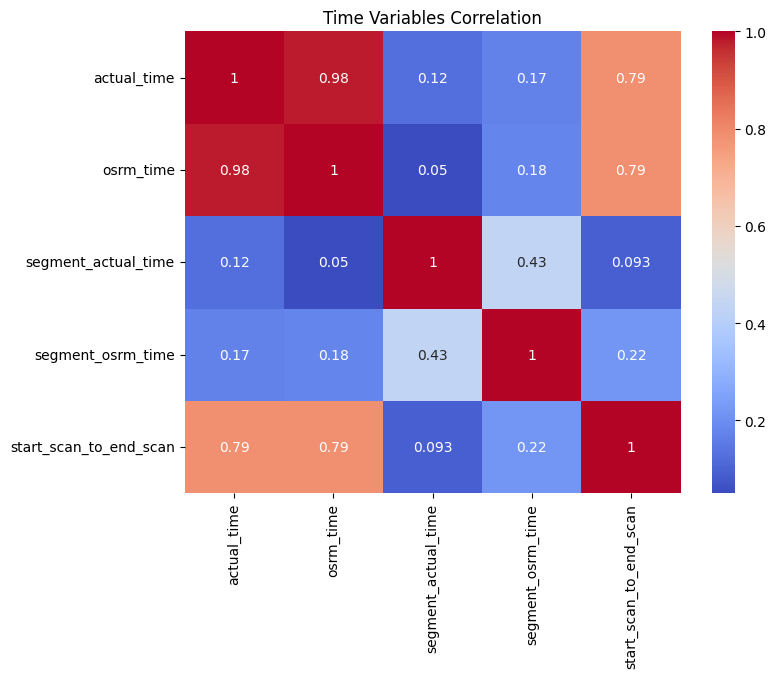

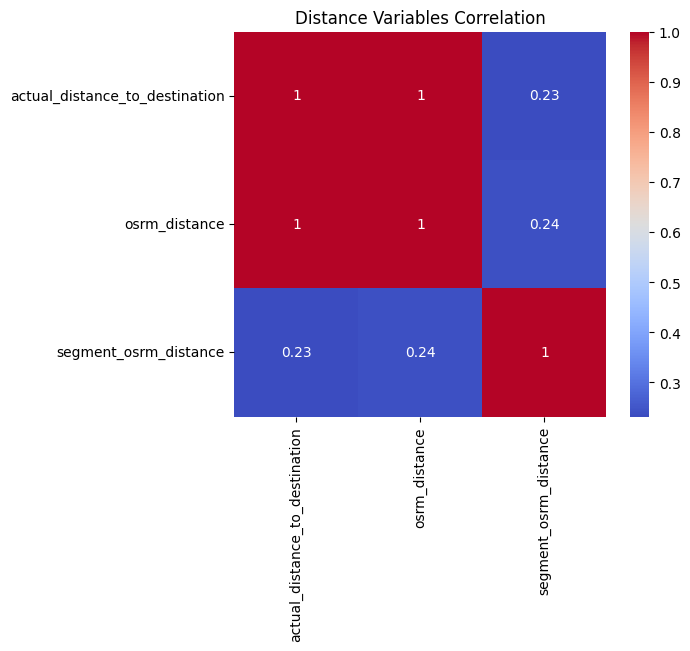

In [ ]:
# Correlation

# Time focused variables
time_cols = ['actual_time', 'osrm_time', 'segment_actual_time', 'segment_osrm_time', 'start_scan_to_end_scan']
plt.figure(figsize=(8,6))
sns.heatmap(df[time_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Time Variables Correlation")
plt.show()

# Distance focused variables
distance_cols = ['actual_distance_to_destination', 'osrm_distance', 'segment_osrm_distance']
plt.figure(figsize=(6,5))
sns.heatmap(df[distance_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Distance Variables Correlation")
plt.show()

### **Insights**:

**Time Variables Correlation**:

* **Actual_time vs OSRM_time**: Very high correlation (+0.98) indicates both variables move together consistently.
* **Actual_time vs Segment_actual_time**: Very weak correlation (+0.12) shows segment times don't properly sum to total trip times.
* **OSRM_time vs Segment_osrm_time**: Weak correlation (+0.18) indicates inconsistency between segment and total OSRM predictions.
* **Start_scan_to_end_scan vs Actual_time**: Strong positive correlation (+0.79) suggests scanning times align well with actual delivery times.
* **Start_scan_to_end_scan vs OSRM_time**: Strong positive correlation (+0.79) shows scanning duration correlates with predicted times.
* **Segment variables correlation**: Moderate correlation (+0.43) between segment_actual_time and segment_osrm_time shows reasonable consistency at segment level.

**Distance Variables Correlation**:

* **Actual_distance vs OSRM_distance**: Perfect correlation (+1.0) indicates these distance measurements are essentially identical.
* **Both distance variables vs Segment_osrm_distance**: Weak correlations (+0.23, +0.24)


## **Feature Engineering**

In [ ]:
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,trip_year,trip_month,trip_hour,trip_weekday,trip_day
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.272727,14.0,11.0,11.9653,1.272727,2018,9,2,3,20
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.200000,10.0,9.0,9.7590,1.111111,2018,9,2,3,20
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.428571,16.0,7.0,10.8152,2.285714,2018,9,2,3,20
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.550000,21.0,12.0,13.0224,1.750000,2018,9,2,3,20
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.545455,6.0,5.0,3.9153,1.200000,2018,9,2,3,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,1.566667,12.0,12.0,8.1858,1.000000,2018,9,16,3,20
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,1.578947,26.0,21.0,17.3725,1.238095,2018,9,16,3,20
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,1.590909,20.0,34.0,20.7053,0.588235,2018,9,16,3,20
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,1.612245,17.0,27.0,18.8885,0.629630,2018,9,16,3,20


In [ ]:
## Creating new column to extract only states details from the source name.
df['source_state'] = df['source_name'].str.extract(r'\((.*?)\)')
df['source_state'].value_counts()

,count
source_state,
Haryana,27499
Maharashtra,21401
Karnataka,19578
Tamil Nadu,7494
Gujarat,7202
Uttar Pradesh,7137
Telangana,6496
West Bengal,5963
Andhra Pradesh,5539


In [ ]:
## Creating new column to extract only states details from the destination name.

df['destination_state'] = df['destination_name'].str.extract(r'\((.*?)\)')
df['destination_state'].value_counts()

,count
destination_state,
Karnataka,21065
Haryana,20622
Maharashtra,18196
West Bengal,8499
Telangana,8205
Tamil Nadu,8058
Uttar Pradesh,7834
Gujarat,6714
Rajasthan,6361


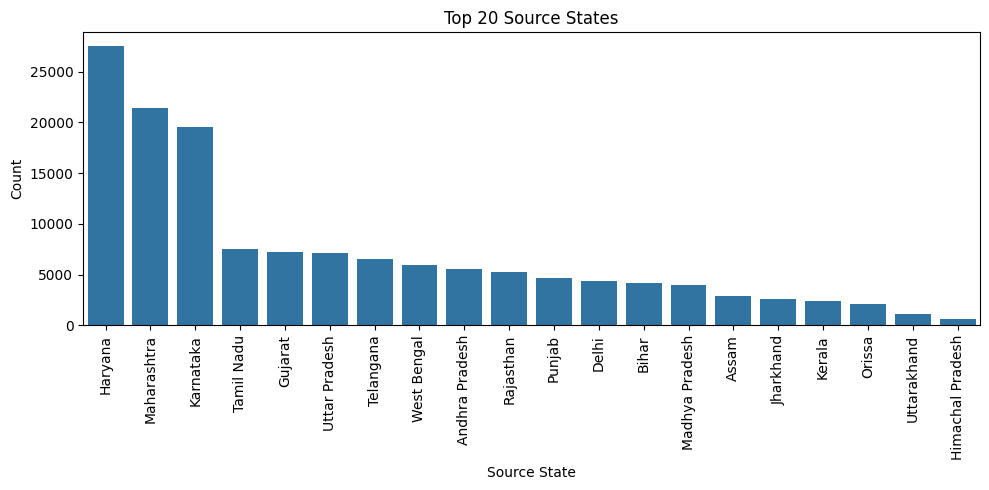

In [ ]:
# Top 20 source states by frequency

top_states = df['source_state'].value_counts().nlargest(20).index.tolist()

plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df[df['source_state'].isin(top_states)], x='source_state', order=top_states)
plt.xticks(rotation=90)
plt.title("Top 20 Source States")
plt.xlabel("Source State")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### **Insights**:

* Haryana, Maharashtra, and Karnataka together account for the highest pickup volumes, with Haryana clearly leading.

* Tamil Nadu, Gujarat, Uttar Pradesh, and Telangana form a strong secondary group of source states.

* All other states (e.g. Uttarakhand, Himachal Pradesh) show significantly lower order counts.

* Resource allocation and capacity planning should be prioritized for the top three states to handle peak demand efficiently.

* For low volume states, should consider consolidating shipments or using shared capacity models to optimize costs.

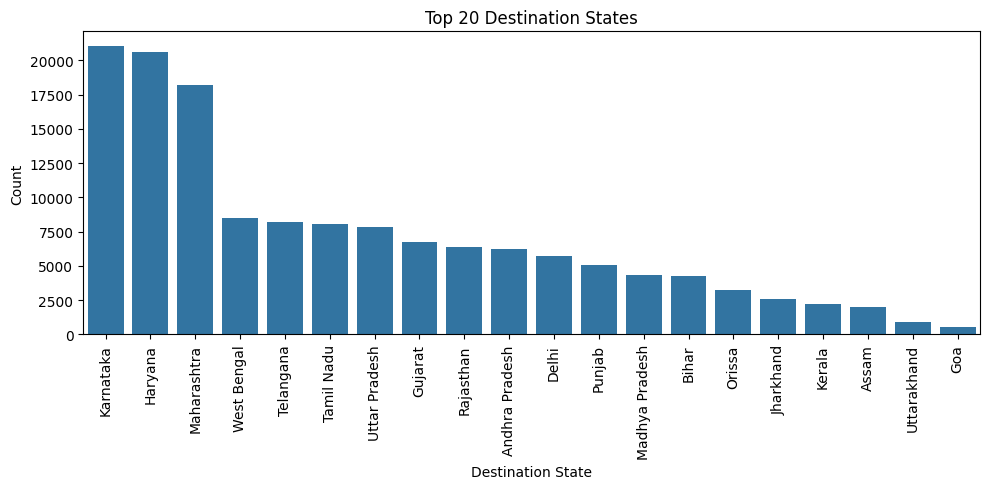

In [ ]:
# Top 20 destination states by frequency

top_states = df['destination_state'].value_counts().nlargest(20).index.tolist()

plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df[df['destination_state'].isin(top_states)], x='destination_state', order=top_states)
plt.xticks(rotation=90)
plt.title("Top 20 Destination States")
plt.xlabel("Destination State")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### **Insights**:

* Karnataka, Haryana, and Maharashtra emerge as the top three destination states, with Karnataka leading at ~21,000 deliveries followed closely by Haryana at ~20,000.

* West Bengal, Telangana, Tamil Nadu, Uttar Pradesh, and Gujarat form a strong mid tier group with consistent delivery volumes around 8,000-9,000 orders each.

* Remaining states like Rajasthan, Andhra Pradesh, Delhi, Punjab, and others show progressively declining volumes, creating a long tail distribution.

* Last mile infrastructure and delivery capacity should be strengthened in Karnataka, Haryana, and Maharashtra to handle the highest delivery loads efficiently.

* The relatively balanced distribution across the top 8-10 states suggests a well distributed customer base requiring nationwide operational coverage rather than concentrated regional focus.

#### Calculating the time taken between od_start_time and od_end_time and keeping it as a feature

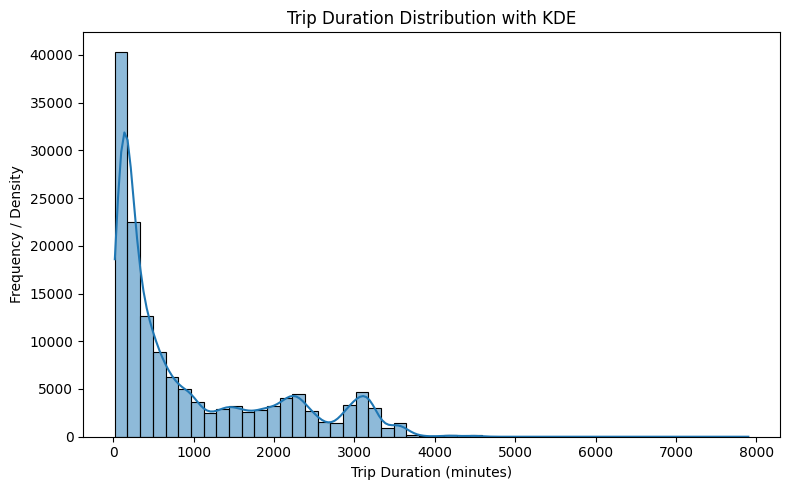

In [ ]:
# creating new feature trip_duration_time (minutes)

# Ensuring timestamps are parsed
df['od_start_time'] = pd.to_datetime(df['od_start_time'], errors='coerce')
df['od_end_time']   = pd.to_datetime(df['od_end_time'], errors='coerce')

# Computing duration in minutes
df['trip_duration_time'] = (df['od_end_time'] - df['od_start_time']).dt.total_seconds() / 60

# Plotting the distribution with KDE
plt.figure(figsize=(8,5))
sns.histplot(df['trip_duration_time'].dropna(), kde=True, bins=50)
plt.title("Trip Duration Distribution with KDE")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Frequency / Density")
plt.tight_layout()
plt.show()


### **Insights**:

* The distribution is right-skewed, with most trips under 1,000 minutes and a long tail extending to 8,000+ minutes.

* A major peak occurs around 200-300 minutes, indicating the modal trip duration for typical deliveries.

* Secondary bumps near 1,500-2,000 and 2,800-3,200 minutes suggest distinct trip categories (e.g., medium haul and long haul shipments).

* A rapid drop off after 3,500 minutes indicates very few ultra long trips, highlighting the rarity of extreme duration deliveries.

* Operational focus on optimizing the 200-1,000 minute range could yield the greatest efficiency gains, while specialized strategies may be needed for medium and long haul segments.

## **Hypothesis Testing**


#### Comparing the difference between Point a. and start_scan_to_end_scan. performing hypothesis testing/ Visual analysis for validation.

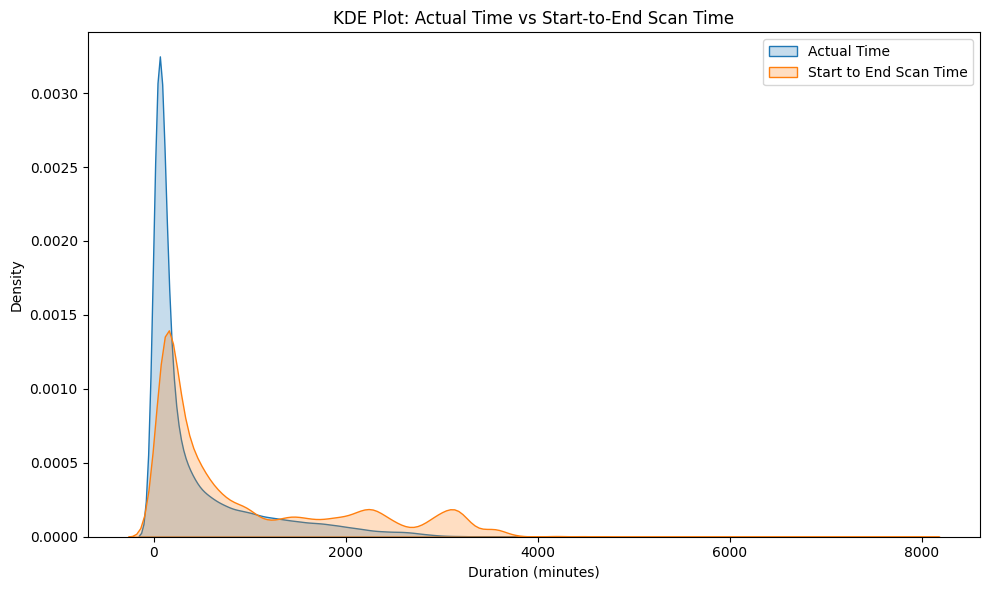

Paired t-statistic: -306.078, p-value: 0.000
Reject the null hypothesis: Significant difference between actual time and scan-to-scan time.


In [ ]:
# Ensuring scan durations are numeric
df['start_scan_to_end_scan'] = pd.to_numeric(df['start_scan_to_end_scan'], errors='coerce')

# Preparing comparison dataframe and dropping NA
comparison_df = df[['actual_time', 'start_scan_to_end_scan']].dropna()

# KDE plot comparison
plt.figure(figsize=(10, 6))
sns.kdeplot(comparison_df['actual_time'], label='Actual Time', fill=True)
sns.kdeplot(comparison_df['start_scan_to_end_scan'], label='Start to End Scan Time', fill=True)
plt.title('KDE Plot: Actual Time vs Start-to-End Scan Time')
plt.xlabel('Duration (minutes)')
plt.legend()
plt.tight_layout()
plt.show()

# Paired t-test (dependent samples)
t_stat, p_val = ttest_rel(
    comparison_df['actual_time'],
    comparison_df['start_scan_to_end_scan'],
    nan_policy='omit'
)

print(f"Paired t-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")

if p_val < 0.05:
    print("Reject the null hypothesis: Significant difference between actual time and scan-to-scan time.")
else:
    print("Fail to reject the null hypothesis: No significant difference between actual time and scan-to-scan time.")


### **Insights**:

* The KDE curves diverge sharply: Actual delivery times cluster tightly around shorter durations (~200-300 min), while scan to scan times are more spread out and shifted right, indicating scans capture a narrower slice of the delivery process.

* The scan to scan distribution shows secondary modes at higher durations (1,500-3,000 min), suggesting occasional long gaps between scans that do not align with actual delivery events.

* The paired t-test yields t = -306.078, p < 0.05, confirming a statistically significant difference between actual and scan-to-scan durations.

* Scan data omits pre scan and post scan activities, underestimating total delivery time this visibility gap can mask process delays.

* Recommendation: Should integrate additional tracking points or extend scan windows to encompass the full delivery lifecycle, ensuring performance metrics reflect true end to end durations.

#### Hypothesis testing / visual analysis between actual_time & OSRM time (aggregated on trip_uuid)

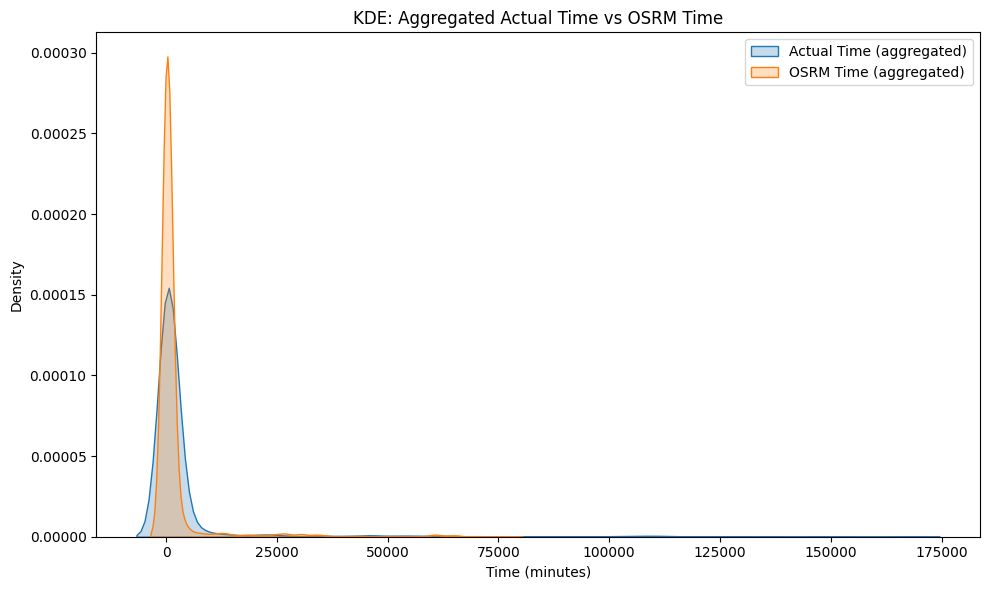

Paired t-statistic: 32.468, p-value: 0.000
Reject null hypothesis: significant difference between aggregated actual and OSRM times.


In [ ]:
# Aggregating actual_time and osrm_time by trip_uuid
agg = df.groupby('trip_uuid').agg({
    'actual_time': 'sum',
    'osrm_time':   'sum'
}).dropna().reset_index()

# KDE comparison of aggregated times
plt.figure(figsize=(10, 6))
sns.kdeplot(agg['actual_time'], label='Actual Time (aggregated)', fill=True)
sns.kdeplot(agg['osrm_time'],   label='OSRM Time (aggregated)',   fill=True)
plt.title('KDE: Aggregated Actual Time vs OSRM Time')
plt.xlabel('Time (minutes)')
plt.legend()
plt.tight_layout()
plt.show()

# Paired t-test on aggregated times
t_stat, p_val = ttest_rel(agg['actual_time'], agg['osrm_time'], nan_policy='omit')  # using omit to ensure if any sample has a NaN those are dropped before computing the test.
print(f"Paired t-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")

if p_val < 0.05:
    print("Reject null hypothesis: significant difference between aggregated actual and OSRM times.")
else:
    print("Fail to reject null hypothesis: no significant difference between aggregated times.")


### **Insights**:

* The KDE curves show the OSRM predicted aggregated times (orange) are tightly concentrated at lower durations compared to actual aggregated times (blue), indicating OSRM generally underestimates total trip durations.

* A pronounced density peak for OSRM around ~200-300 minutes contrasts with a broader actual time peak around ~300-400 minutes, reflecting consistent under prediction.

* The actual time distribution has a heavier right tail, extending beyond, whereas OSRM’s tail drops off sharply highlighting occasional long trips.

* The paired t-test (t = 32.468, p < 0.05) confirms a statistically significant difference between aggregated actual and OSRM times.

Recommendation: Introduce a calibration factor or machine learning adjustment to OSRM outputs to better align predicted total trip times with observed realities.

#### Hypothesis testing / visual analysis between actual_time & segment actual time (aggregated on trip_uuid)

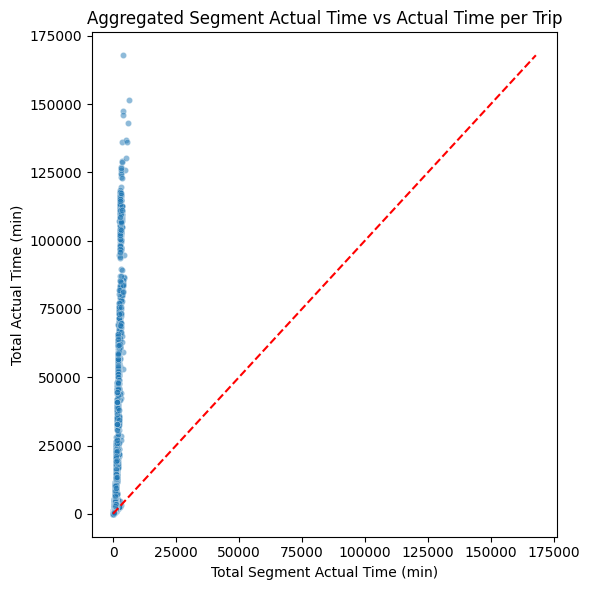

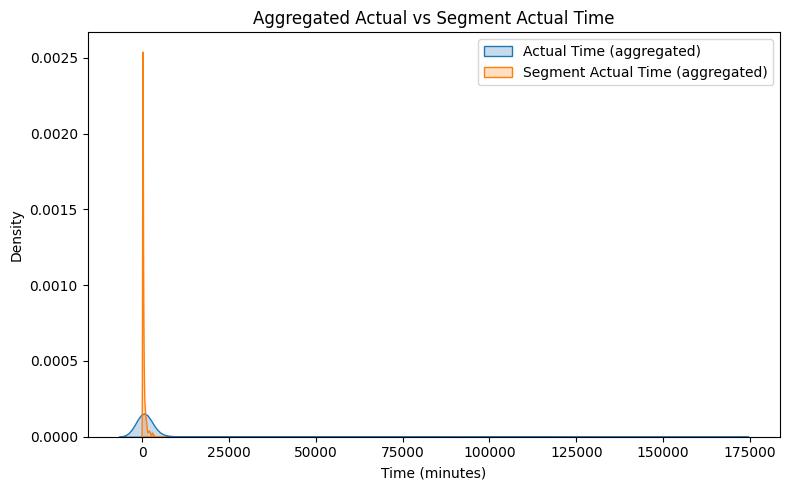

Paired t-statistic: 30.756, p-value: 0.000
Reject null hypothesis: significant difference between aggregated actual time and segment actual time.


In [ ]:
# Aggregating actual_time and segment_actual_time by trip_uuid
agg = df.groupby('trip_uuid').agg({
    'actual_time':         'sum',
    'segment_actual_time': 'sum'
}).dropna().reset_index()

# Scatterplot of aggregated times with 45deg reference line
plt.figure(figsize=(6,6))
sns.scatterplot(
    data=agg,
    x='segment_actual_time',
    y='actual_time',
    alpha=0.5,
    s=20
)
max_val = agg[['segment_actual_time','actual_time']].max().max()
plt.plot([0, max_val], [0, max_val], ls='--', color='red')
plt.title('Aggregated Segment Actual Time vs Actual Time per Trip')
plt.xlabel('Total Segment Actual Time (min)')
plt.ylabel('Total Actual Time (min)')
plt.tight_layout()
plt.show()

# KDE distributions overlay
plt.figure(figsize=(8,5))
sns.kdeplot(agg['actual_time'], label='Actual Time (aggregated)', fill=True)
sns.kdeplot(agg['segment_actual_time'], label='Segment Actual Time (aggregated)', fill=True)
plt.title('Aggregated Actual vs Segment Actual Time')
plt.xlabel('Time (minutes)')
plt.legend()
plt.tight_layout()
plt.show()

# Paired t-test on aggregated times
t_stat, p_val = ttest_rel(
    agg['actual_time'],
    agg['segment_actual_time'],
    nan_policy='omit'
)
print(f"Paired t-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")
if p_val < 0.05:
    print("Reject null hypothesis: significant difference between aggregated actual time and segment actual time.")
else:
    print("Fail to reject null hypothesis: no significant difference between aggregated times.")


### **Insights**:

* The scatterplot shows almost all points lie above the 45° reference line, indicating that aggregated segment times underestimate total actual trip durations.

* The KDE overlay reveals a sharp peak for aggregated segment times near zero versus a broader distribution for aggregated actual times, reflecting missing time between segments.

* The paired t-test (t = 30.756, p < 0.05) confirms a highly significant difference between aggregated segment and total actual times.


#### Hypothesis testing / visual analysis between osrm distance & segment osrm (aggregated on trip_uuid)

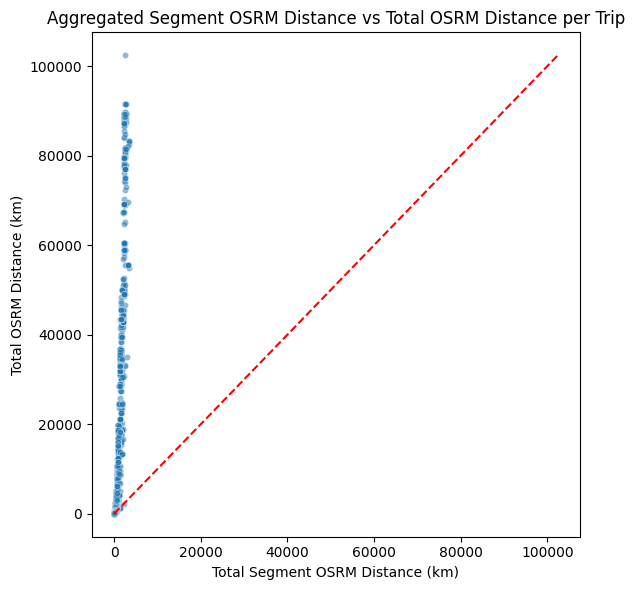

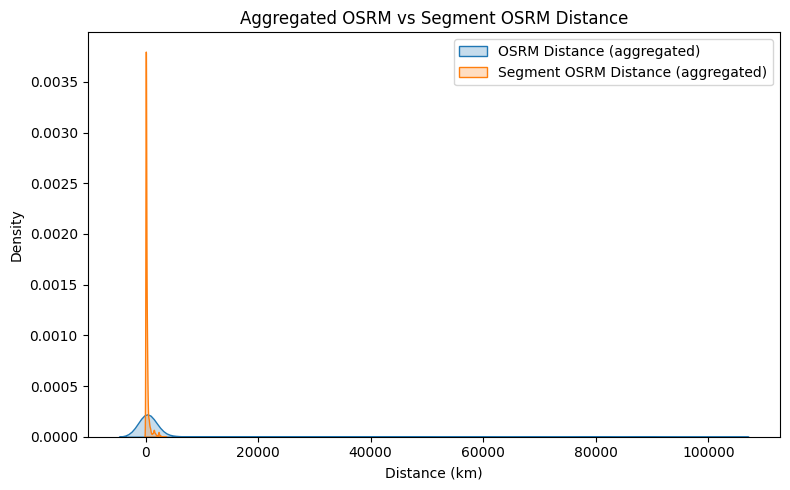

Paired t-statistic: 30.030, p-value: 0.000
Reject null hypothesis: significant difference between total OSRM and segment OSRM distances.


In [ ]:
# Aggregating osrm_distance and segment_osrm_distance by trip_uuid
agg_dist = df.groupby('trip_uuid').agg({
    'osrm_distance': 'sum',
    'segment_osrm_distance': 'sum'
}).dropna().reset_index()

# Scatterplot of aggregated distances with 45° reference line
plt.figure(figsize=(6,6))
sns.scatterplot(
    data=agg_dist,
    x='segment_osrm_distance',
    y='osrm_distance',
    alpha=0.5,
    s=20
)
max_val = agg_dist[['segment_osrm_distance','osrm_distance']].max().max()
plt.plot([0, max_val], [0, max_val], ls='--', color='red')
plt.title('Aggregated Segment OSRM Distance vs Total OSRM Distance per Trip')
plt.xlabel('Total Segment OSRM Distance (km)')
plt.ylabel('Total OSRM Distance (km)')
plt.tight_layout()
plt.show()

# KDE distributions overlay
plt.figure(figsize=(8,5))
sns.kdeplot(agg_dist['osrm_distance'], label='OSRM Distance (aggregated)', fill=True)
sns.kdeplot(agg_dist['segment_osrm_distance'], label='Segment OSRM Distance (aggregated)', fill=True)
plt.title('Aggregated OSRM vs Segment OSRM Distance')
plt.xlabel('Distance (km)')
plt.legend()
plt.tight_layout()
plt.show()

# Paired t-test on aggregated distances
t_stat, p_val = ttest_rel(
    agg_dist['osrm_distance'],
    agg_dist['segment_osrm_distance'],
    nan_policy='omit'
)
print(f"Paired t-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")
if p_val < 0.05:
    print("Reject null hypothesis: significant difference between total OSRM and segment OSRM distances.")
else:
    print("Fail to reject null hypothesis: no significant difference between the two distance measures.")


### **Insights**:

* The scatterplot shows almost all points lie above the 45° line, indicating aggregated segment distances underestimate the true total OSRM distances per trip.

* The KDE overlay reveals a narrow, high peak for segment distances near zero versus a broader distribution for total distances, reflecting missing intersegment travel in the segment sums.

* The paired t-test (t = 30.03, p < 0.05) confirms a highly significant difference between aggregated segment distances and total OSRM distances.


#### Hypothesis testing / visual analysis between osrm time & segment osrm time(aggregated on trip_uuid)

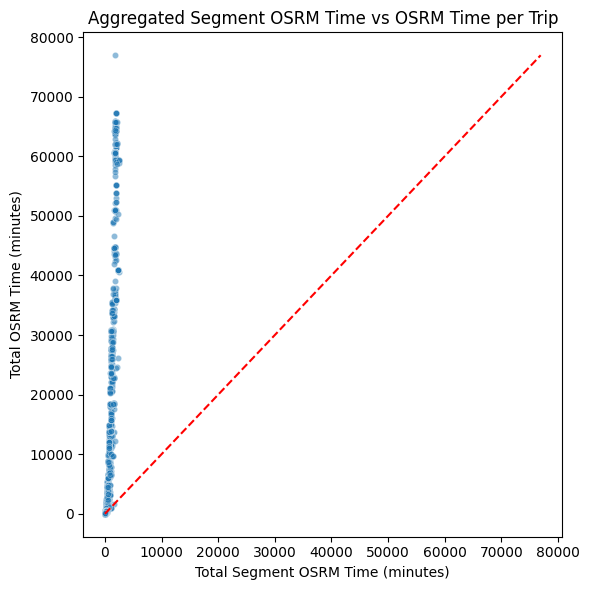

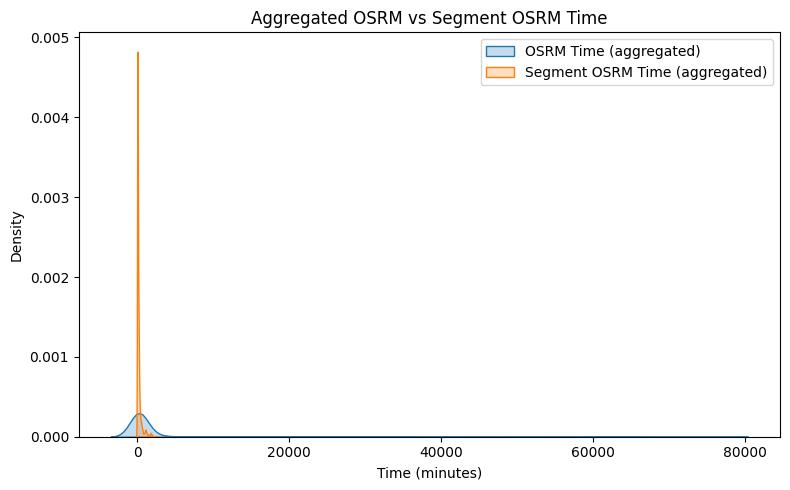

Paired t-statistic: 30.297, p-value: 0.000
Reject null hypothesis: significant difference between aggregated OSRM and segment OSRM times.


In [ ]:
# Aggregating osrm_time and segment_osrm_time by trip_uuid
agg_osrm = df.groupby('trip_uuid').agg({
    'osrm_time': 'sum',
    'segment_osrm_time': 'sum'
}).dropna().reset_index()

# Scatterplot with 45-degree reference
plt.figure(figsize=(6,6))
sns.scatterplot(
    data=agg_osrm,
    x='segment_osrm_time',
    y='osrm_time',
    alpha=0.5,
    s=20
)
max_val = agg_osrm[['segment_osrm_time','osrm_time']].max().max()
plt.plot([0,max_val], [0,max_val], ls='--', color='red')
plt.title('Aggregated Segment OSRM Time vs OSRM Time per Trip')
plt.xlabel('Total Segment OSRM Time (minutes)')
plt.ylabel('Total OSRM Time (minutes)')
plt.tight_layout()
plt.show()

# KDE plot comparison
plt.figure(figsize=(8,5))
sns.kdeplot(agg_osrm['osrm_time'], label='OSRM Time (aggregated)', fill=True)
sns.kdeplot(agg_osrm['segment_osrm_time'], label='Segment OSRM Time (aggregated)', fill=True)
plt.title('Aggregated OSRM vs Segment OSRM Time')
plt.xlabel('Time (minutes)')
plt.legend()
plt.tight_layout()
plt.show()

# Paired t-test on aggregated OSRM times
t_stat, p_val = ttest_rel(
    agg_osrm['osrm_time'],
    agg_osrm['segment_osrm_time'],
    nan_policy='omit'
)
print(f"Paired t-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")
if p_val < 0.05:
    print("Reject null hypothesis: significant difference between aggregated OSRM and segment OSRM times.")
else:
    print("Fail to reject null hypothesis: no significant difference between aggregated OSRM and segment OSRM times.")


### **Insights**:

* The scatterplot shows that aggregated segment OSRM times generally underestimate total OSRM times per trip as most points lie above the 45° reference line.

* The KDE plot shows aggregated segment OSRM times have a sharper, higher peak near zero, whereas total OSRM times are more spread out, indicating segment times do not capture all time components.

* The paired t-test (t = 30.297, p < 0.05) confirms a significant difference between aggregated segment OSRM time and total OSRM time.

#### Finding outliers in the numerical variables and validate it using visual analysis.

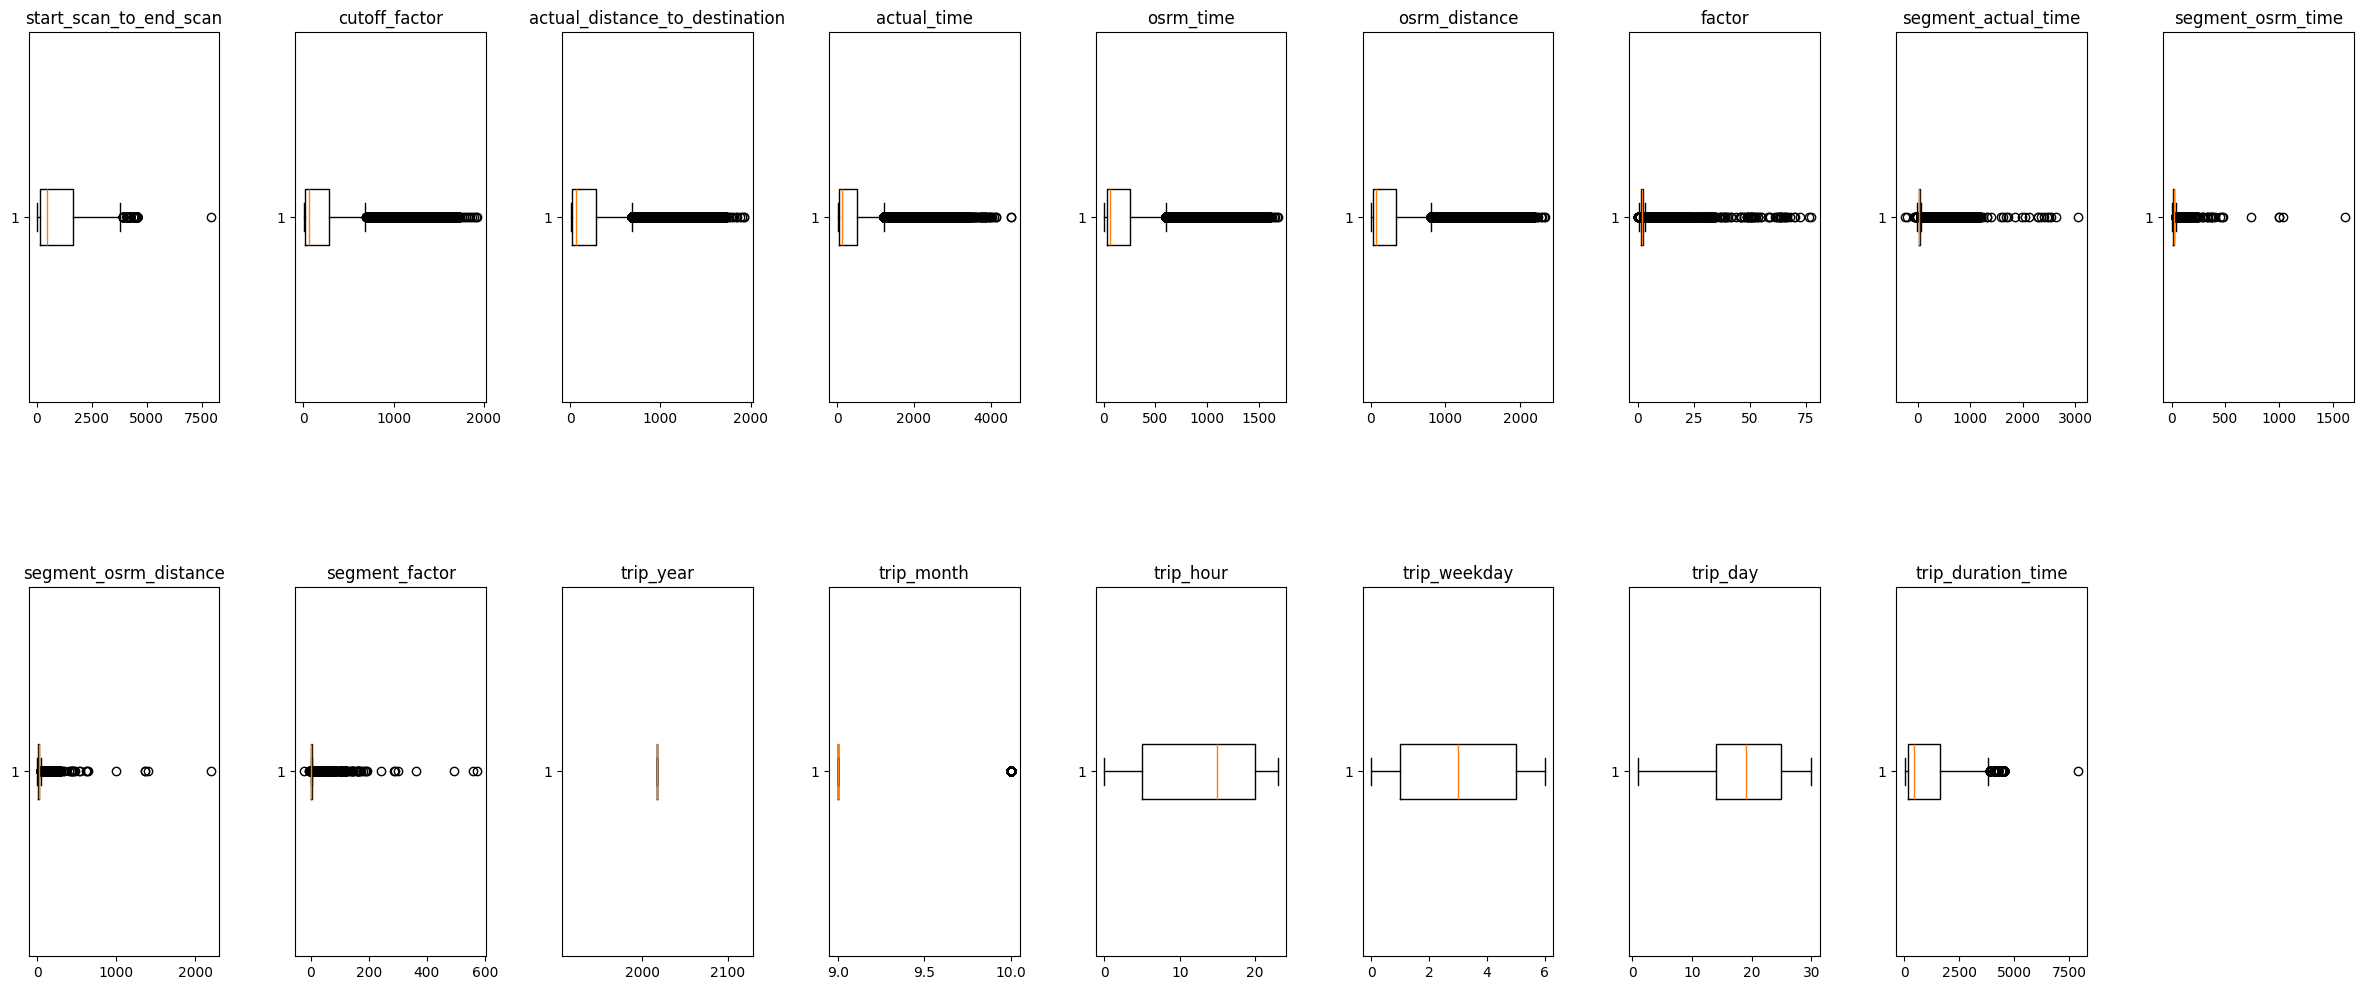

start_scan_to_end_scan: 373 outliers
cutoff_factor: 17246 outliers
actual_distance_to_destination: 17992 outliers
actual_time: 16633 outliers
osrm_time: 17603 outliers
osrm_distance: 17816 outliers
factor: 11429 outliers
segment_actual_time: 9298 outliers
segment_osrm_time: 6378 outliers
segment_osrm_distance: 4315 outliers
segment_factor: 13976 outliers
trip_year: 0 outliers
trip_month: 17518 outliers
trip_hour: 0 outliers
trip_weekday: 0 outliers
trip_day: 0 outliers
trip_duration_time: 373 outliers


In [ ]:
# Selecting numerical columns

num_cols = df.select_dtypes(include=['number']).columns.tolist()

plt.figure(figsize=(30, 12))  # Larger figure for spacing
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, (len(num_cols)+1)//2, i)
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(col)

plt.subplots_adjust(hspace=0.5, wspace=0.4)  # Adjusting vertical and horizontal spacing
plt.show()

# Function to find outliers using IQR method
def find_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return series[(series < lower_bound) | (series > upper_bound)]

# Print outliers count by column
for col in num_cols:
    outliers = find_outliers(df[col].dropna())
    print(f"{col}: {len(outliers)} outliers")



### **Insights**:

The boxplots confirm the presence of significant outliers in nearly all numerical variables such as durations, distances, and factors. Many data points lie well outside the whiskers indicating extreme values. The printed counts show thousands of outliers in key variables like actual_time, osrm_time, and distances.

Outliers likely represent:

* Very long or unusual trips.

* Data entry or measurement errors.

* Potentially valid but rare cases affecting distribution spread.

* The large number of outliers implies the dataset is highly skewed and could benefit from robust treatment like log transform or trimming based on domain knowledge to improve model robustness and interpretability.

#### Handling the outliers using IQR method.

**Outlier Treatment**:

Outliers were addressed using two complementary approaches:

* Removal (for impossible values such as negative or system error times).

* Capping (for extreme but valid delays), ensuring that unusual trips were preserved while reducing their disproportionate influence on statistical tests.

In [ ]:
 #Removing Outliers Using IQR

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

num_cols = df.select_dtypes(include=['number']).columns.tolist()

df_cleaned = df.copy()
for col in num_cols:
    before_rows = df_cleaned.shape[0]
    df_cleaned = remove_outliers_iqr(df_cleaned, col)
    after_rows = df_cleaned.shape[0]
    removed_count = before_rows - after_rows
    print(f"Removed {removed_count} outliers in column '{col}'")

print(f"Final shape after outlier removal: {df_cleaned.shape}")


Removed 373 outliers in column 'start_scan_to_end_scan'
Removed 17052 outliers in column 'cutoff_factor'
Removed 14112 outliers in column 'actual_distance_to_destination'
Removed 8809 outliers in column 'actual_time'
Removed 7905 outliers in column 'osrm_time'
Removed 5929 outliers in column 'osrm_distance'
Removed 6025 outliers in column 'factor'
Removed 2898 outliers in column 'segment_actual_time'
Removed 1840 outliers in column 'segment_osrm_time'
Removed 255 outliers in column 'segment_osrm_distance'
Removed 6234 outliers in column 'segment_factor'
Removed 0 outliers in column 'trip_year'
Removed 8775 outliers in column 'trip_month'
Removed 0 outliers in column 'trip_hour'
Removed 0 outliers in column 'trip_weekday'
Removed 0 outliers in column 'trip_day'
Removed 5803 outliers in column 'trip_duration_time'
Final shape after outlier removal: (58857, 32)


In [ ]:
#Capping Outliers Using IQR

def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

num_cols = df.select_dtypes(include=['number']).columns.tolist()

df_capped = df.copy()
for col in num_cols:
    df_capped = cap_outliers_iqr(df_capped, col)

print(f"Outliers capped successfully. Dataset shape: {df_capped.shape}")


Outliers capped successfully. Dataset shape: (144867, 32)


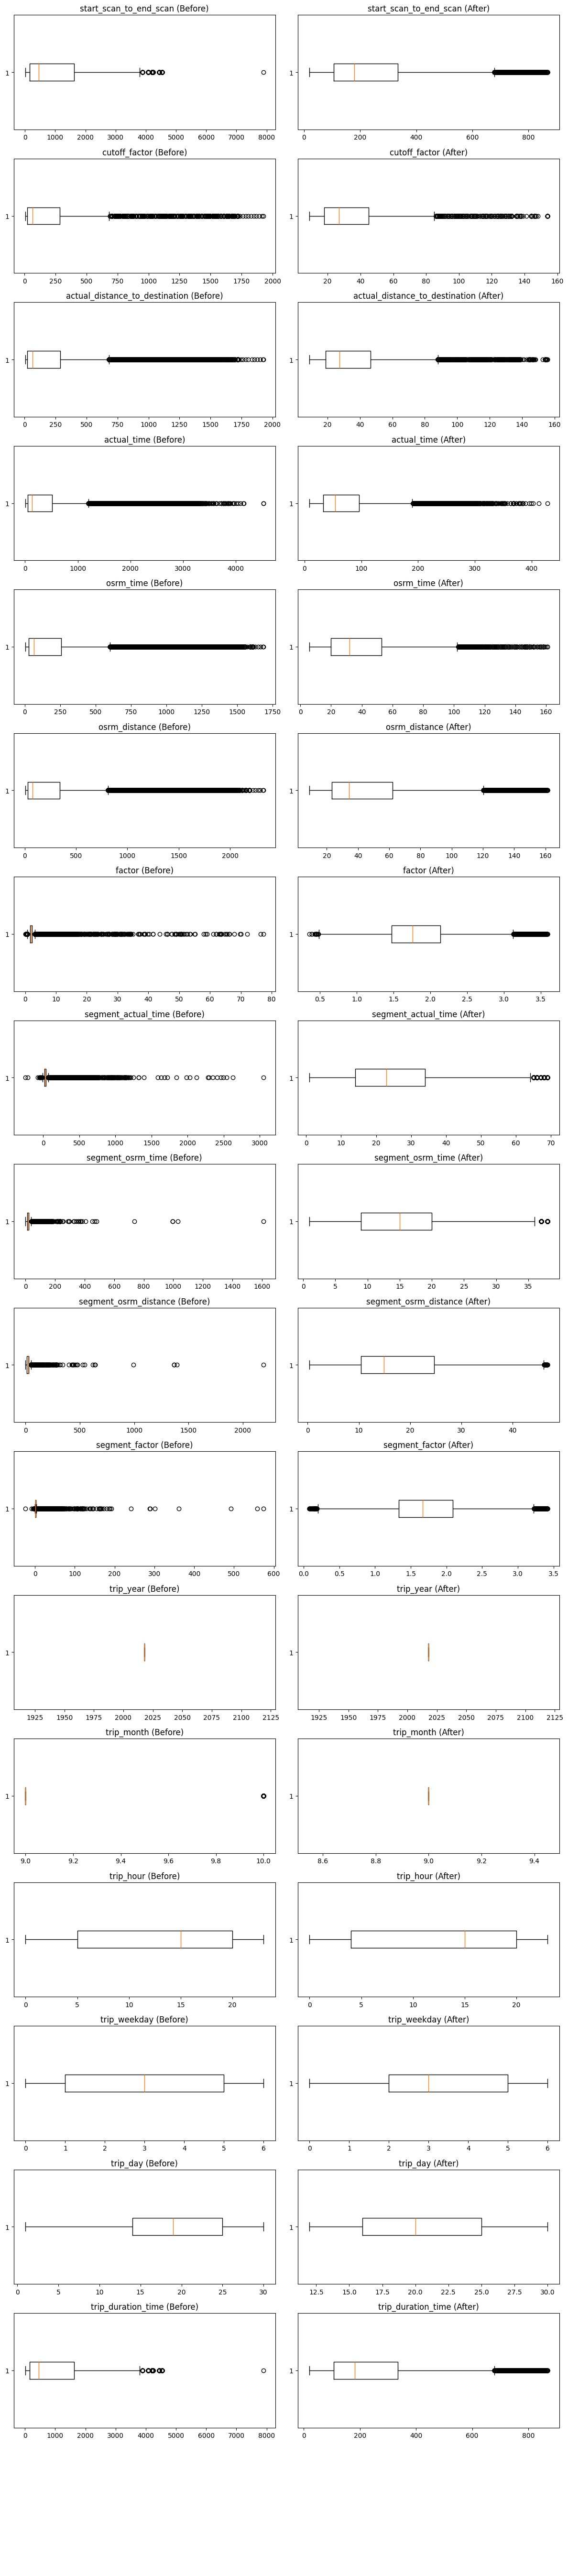

In [ ]:
# Plotting box plot before and after handling outliers

def plot_boxplots(df_before, df_after, columns):
    n = len(columns)
    cols = 2
    rows = int(np.ceil(n / cols) * 2)  # 2 rows per variable (before & after)

    fig, axes = plt.subplots(rows, cols, figsize=(12, rows*3))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        before_idx = i * 2
        after_idx = before_idx + 1

        # Plot before handling outlier
        axes[before_idx].boxplot(df_before[col].dropna(), vert=False)
        axes[before_idx].set_title(f'{col} (Before)')

        # Plot after handling outlier
        axes[after_idx].boxplot(df_after[col].dropna(), vert=False)
        axes[after_idx].set_title(f'{col} (After)')

    # If total subplots > needed plots, hide extra subplots
    for j in range(after_idx + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Usage example
num_cols = df.select_dtypes(include=['number']).columns.tolist()
plot_boxplots(df, df_cleaned, num_cols)  # or df_capped


### **Insights**:

* Outlier treatment successfully reduced extreme maximum values in key numerical variables like actual_time, osrm_time, osrm_distance, and others. The "After" boxplots show a much shorter whisker range, indicating fewer extreme outlier values.

* Variables such as factor and segment_actual_time show a clearer central dispersion with less extreme spread after treatment, improving data consistency.

* Some categorical/time variables like trip_month, trip_hour, trip_weekday, and trip_day logically show little to no change before and after since they typically have limited range or fixed categories.

* A notable reduction in outlier points helps reduce skewness, making the dataset more balanced and improving statistical analysis or modeling robustness.

* However, some variables like trip_duration_time and start_scan_to_end_scan still have minor outliers after treatment, suggesting either allowable extreme values or additional cleaning might be needed depending on domain context.

* Overall, the IQR method of outlier handling has normalized the dataset ranges and preserved most data points, increasing the reliability of downstream insights or models based on this data.

### one hot encoding of categorical variables

In [ ]:
# Identifying categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", categorical_cols)

# One hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Check result
print("Original shape:", df.shape)
print("Encoded shape :", df_encoded.shape)
df_encoded

Categorical columns: ['data', 'route_schedule_uuid', 'route_type', 'trip_uuid', 'source_center', 'source_name', 'destination_center', 'destination_name', 'is_cutoff', 'source_state', 'destination_state']
Original shape: (144867, 32)
Encoded shape : (144867, 22357)


,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,...,destination_state_Orissa,destination_state_Pondicherry,destination_state_Punjab,destination_state_Rajasthan,destination_state_Tamil Nadu,destination_state_Telangana,destination_state_Tripura,destination_state_Uttar Pradesh,destination_state_Uttarakhand,destination_state_West Bengal
0,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,...,False,False,False,False,False,False,False,False,False,False
1,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,...,False,False,False,False,False,False,False,False,False,False
2,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27,NaT,27.637279,40.0,28.0,32.5395,...,False,False,False,False,False,False,False,False,False,False
3,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,...,False,False,False,False,False,False,False,False,False,False
4,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,45,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,...,False,False,False,False,False,False,False,False,False,False
144863,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,54,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,...,False,False,False,False,False,False,False,False,False,False
144864,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,63,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,...,False,False,False,False,False,False,False,False,False,False
144865,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,72,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,...,False,False,False,False,False,False,False,False,False,False


#### Top Origin States by Order Volume

In [ ]:
# Extracting Origin State from source_name
df['origin_state'] = df['source_name'].str.extract(r'\((.*?)\)$')

# Count of orders by origin_state
orders_by_state = df['origin_state'].value_counts()

# Displaying top origin states by order volume
print(orders_by_state.head())

origin_state
Haryana        27499
Maharashtra    21401
Karnataka      19578
Tamil Nadu      7494
Gujarat         7202
Name: count, dtype: int64


Busiest Corridors (Origin - Destination pairs)

In [ ]:
# Extracting 'destination_state' from 'destination_name' assuming format ends with "(State)"
df['destination_state'] = df['destination_name'].str.extract(r'\((.*?)\)$')

# Grouping by origin_state and destination_state and count trips
corridor_counts = df.groupby(['origin_state', 'destination_state']).size().reset_index(name='trip_count')

# Sorting corridors by trip_count in descending order and getting top corridors
top_corridors = corridor_counts.sort_values(by='trip_count', ascending=False).head()

print(top_corridors)

      origin_state destination_state  trip_count
98     Maharashtra       Maharashtra       11876
72       Karnataka         Karnataka       11107
129     Tamil Nadu        Tamil Nadu        6549
144  Uttar Pradesh     Uttar Pradesh        4978
47         Haryana         Karnataka        4976


Calculation of Average Distance and Time per Corridor

In [ ]:
# Calculating average actual time and distance per corridor
corridor_avg = df.groupby(['origin_state', 'destination_state']).agg(
    actual_distance_to_destination=('actual_distance_to_destination', 'mean'),
    actual_time=('actual_time', 'mean'),
    trip_count=('trip_uuid', 'count')
).reset_index()

# Sorting corridors by trip_count in descending order and filter top corridors
top_corridor_avg = corridor_avg.sort_values(by='trip_count', ascending=False)

print(top_corridor_avg)


         origin_state destination_state  actual_distance_to_destination  \
98        Maharashtra       Maharashtra                       64.032019   
72          Karnataka         Karnataka                       33.600526   
129        Tamil Nadu        Tamil Nadu                       29.107871   
144     Uttar Pradesh     Uttar Pradesh                       50.983726   
47            Haryana         Karnataka                      859.827666   
..                ...               ...                             ...   
13              Assam           Tripura                       52.313331   
104           Mizoram             Assam                       50.888123   
58   Himachal Pradesh           Haryana                       22.392697   
103         Meghalaya         Meghalaya                       28.445474   
32            Gujarat       Daman & Diu                        9.376028   

     actual_time  trip_count  
98    138.181627       11876  
72     72.443594       11107  
129   

Deviation of actual time from OSRM predicated time

In [ ]:
# Calculating the deviation of actual time from OSRM predicted time
df['time_deviation'] = df['actual_time'] - df['osrm_time']

# Displaying the summary statistics of the deviation
deviation_summary = df['time_deviation'].describe()
print(deviation_summary)


count    144867.000000
mean        203.059254
std         303.743664
min        -110.000000
25%          21.000000
50%          65.000000
75%         247.000000
max        3137.000000
Name: time_deviation, dtype: float64


Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.

Numerical columns: ['start_scan_to_end_scan', 'cutoff_factor', 'actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance', 'segment_factor', 'trip_year', 'trip_month', 'trip_hour', 'trip_weekday', 'trip_day', 'trip_duration_time']


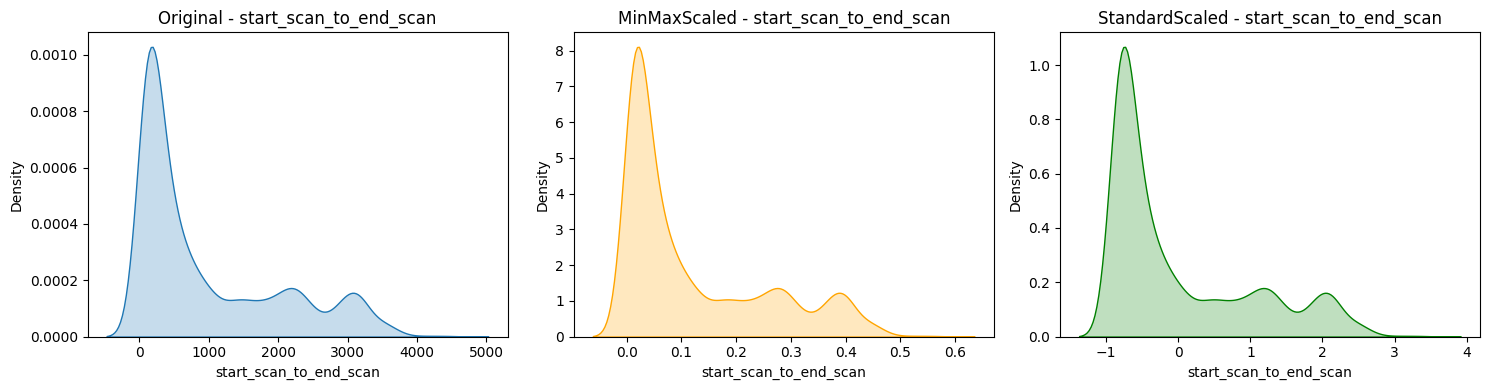

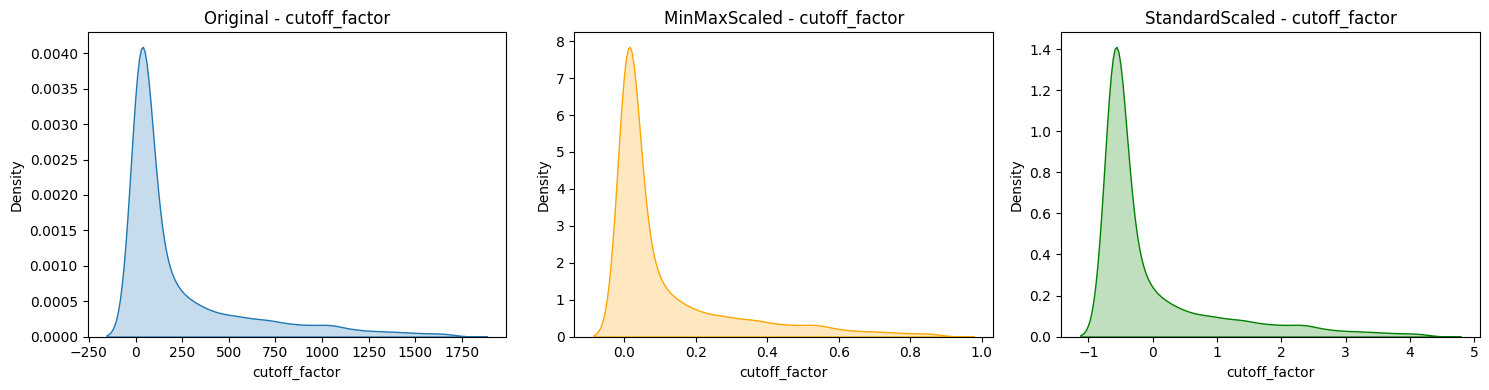

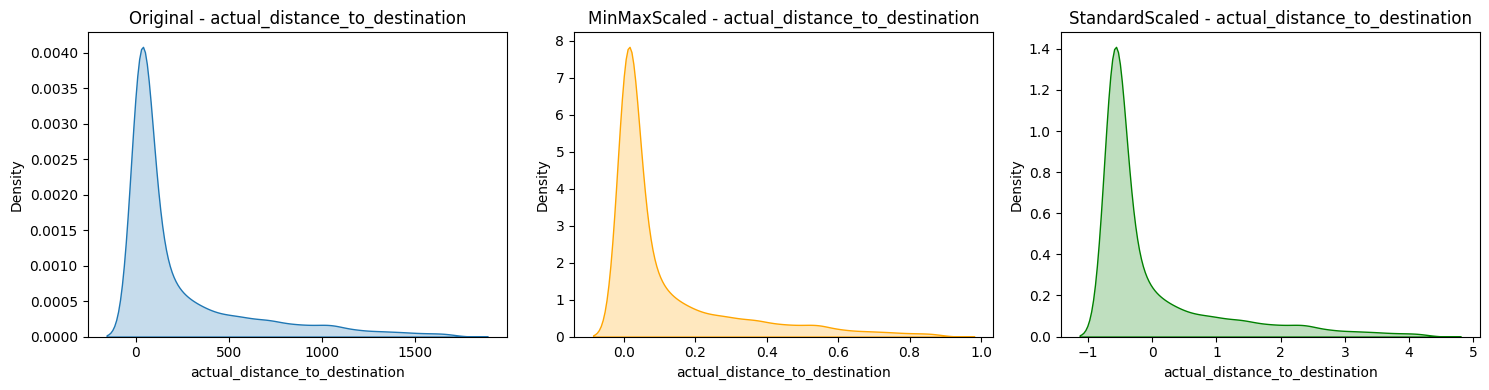

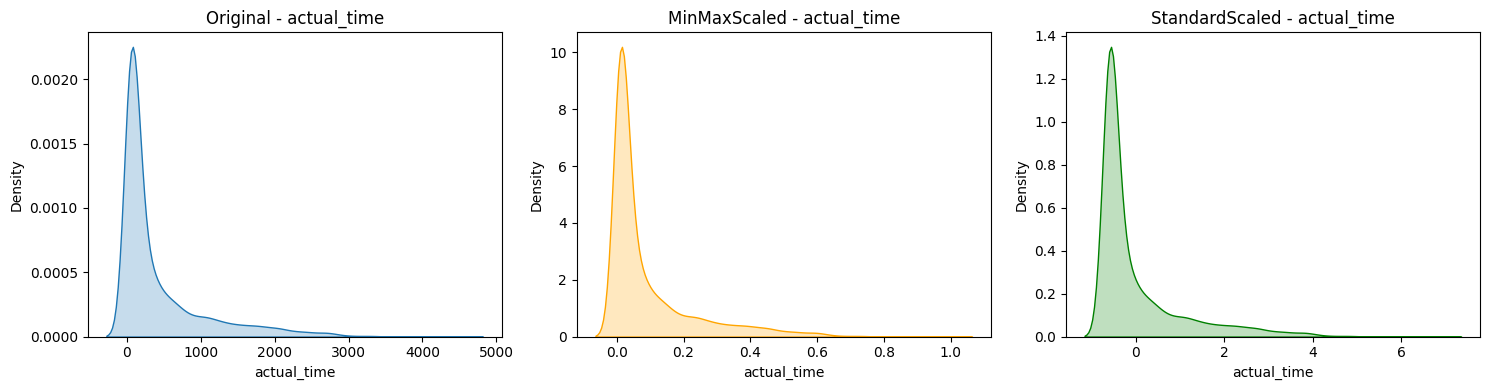

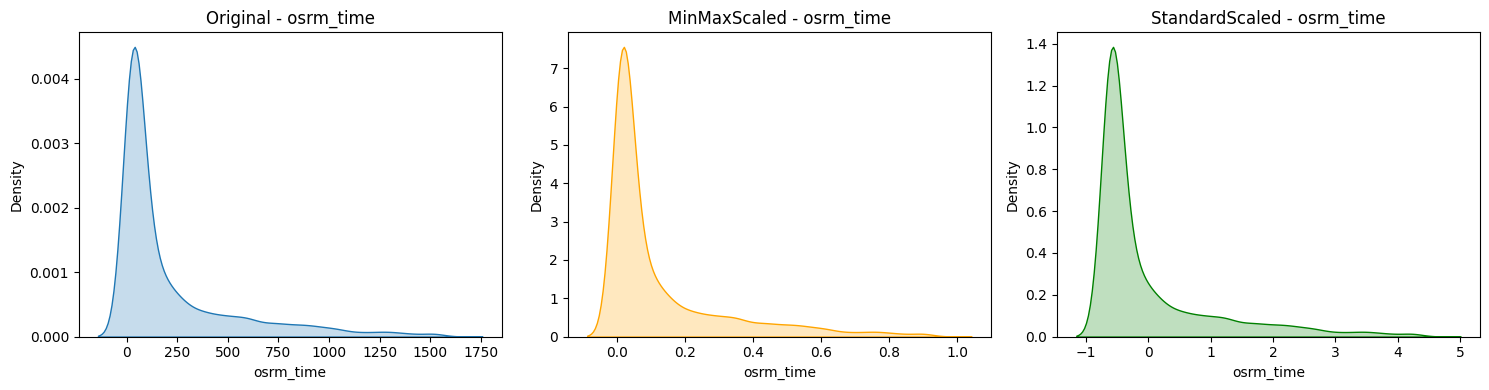


After MinMax Scaling:
   start_scan_to_end_scan  cutoff_factor  actual_distance_to_destination  \
0                0.008378       0.000000                        0.000748   
1                0.008378       0.004692                        0.005180   
2                0.008378       0.009385                        0.009715   
3                0.008378       0.014077                        0.014135   
4                0.008378       0.015641                        0.015839   

   actual_time  osrm_time  osrm_distance    factor  segment_actual_time  \
0     0.001105   0.002976       0.001276  0.014613             0.078300   
1     0.003316   0.008333       0.005488  0.013671             0.077086   
2     0.006854   0.013095       0.010155  0.016630             0.078907   
3     0.011718   0.020238       0.015775  0.018202             0.080425   
4     0.013044   0.022619       0.019511  0.018143             0.075873   

   segment_osrm_time  segment_osrm_distance  segment_factor  trip_yea

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Identifying numerical columns
numerical_cols = df_encoded.select_dtypes(include=['number']).columns.tolist()
print("Numerical columns:", numerical_cols)

# Applying MinMaxScaler
minmax_scaler = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(
    minmax_scaler.fit_transform(df_encoded[numerical_cols]),
    columns=numerical_cols
)

# Applying StandardScaler
standard_scaler = StandardScaler()
df_standard_scaled = pd.DataFrame(
    standard_scaler.fit_transform(df_encoded[numerical_cols]),
    columns=numerical_cols
)

# Visualizing first 5 columns
sample_size = min(10000, len(df_encoded))  # plot at most 10k points
df_sample = df_encoded.sample(sample_size, random_state=42)
df_min_sample = df_minmax_scaled.loc[df_sample.index]
df_std_sample = df_standard_scaled.loc[df_sample.index]

for col in numerical_cols[:5]:
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    # Original
    sns.kdeplot(df_sample[col], ax=axes[0], fill=True)
    axes[0].set_title(f"Original - {col}")

    # MinMax scaled
    sns.kdeplot(df_min_sample[col], ax=axes[1], fill=True, color="orange")
    axes[1].set_title(f"MinMaxScaled - {col}")

    # Standard scaled
    sns.kdeplot(df_std_sample[col], ax=axes[2], fill=True, color="green")
    axes[2].set_title(f"StandardScaled - {col}")

    plt.tight_layout()
    plt.show()

# Preview scaled dataframes
print("\nAfter MinMax Scaling:")
print(df_minmax_scaled.head())

print("\nAfter Standard Scaling:")
print(df_standard_scaled.head())


# **Final Summary & Business Recommendations**

## **Key Business Insights**

* OSRM routing time estimates generally provide conservative predictions that closely align with actual delivery times, offering accurate buffers for real world conditions.

* Individual delivery segments with exceptionally long durations disproportionately increase overall trip transit time, highlighting operational bottlenecks.

* Performance variability is significantly higher at certain hubs like Gurgaon,Bilaspur and Bhiwandi, Mankoli, indicating inconsistent delivery processes that require urgent attention.

* Delivery demand patterns reveal a strong mid month surge in trips, with Wednesday being the busiest weekday, and notable peak activity during early morning and evening hours.

* Aggregated OSRM times, segment actual times, segment OSRM distances, and segment OSRM times all significantly underestimate their respective total trip level counterparts (all p < 0.05), indicating incomplete capture at the segment level and systematic underprediction by OSRM estimates. This was confirmed by paired t-tests and visualized by scatterplots and KDE distributions.

* Short distance deliveries often experience high variability in time, indicating urban congestion and potential inefficiencies in last mile logistics.

* Scan to scan tracking times underestimate total delivery duration, suggesting gaps in end to end operational visibility.

* The majority of shipments originate from Haryana, Maharashtra, and Karnataka, thereby prioritizing these regions for resource allocation and capacity planning.

## **Recommendations**

* Calibrate OSRM estimates using empirical correction factors to better align predicted trip times with observed results.

* Enhance tracking coverage to monitor the full delivery lifecycle, bridging data gaps between segments for improved visibility.

* Optimize operational processes by prioritizing the reduction of segment level delays and streamlining last mile logistics where discrepancies are highest.

* Regularly audit and update routing algorithms to ensure forecasts remain accurate across changing routes and operational conditions.

* Expand tracking points by integratating more granular scan events and extend scan windows to capture the full delivery lifecycle, ensuring operational metrics reflect true end to end durations.

* Implement process audits, target underperforming corridors and hubs for detailed process reviews and interventions, focusing on bottlenecks identified through segment level delays.

* Standardize best practices by benchmarking high performing hubs (e.g., Chandigarh, Bengaluru) and replicate their workflows and staffing models across more variable locations for greater consistency.

* Apply robust statistical outlier handling (removal/capping) on trip and segment times, improving data reliability for operational and forecasting decisions.

* Tailored resource allocation by prioritize fleet, staff, and infrastructure investments in states and destinations with highest volume and delivery variability, and consider shared models for low volume regions.

* Enhance efficiency in short distance deliveries by deploying micro fulfillment centers and leveraging real time, traffic responsive routing to minimize urban congestion and operational delays.

* Implement an incentive program to recognize and reward employees who consistently meet or exceed delivery time targets, fostering accountability and motivating high performance.

